<a href="https://colab.research.google.com/github/SandumiJay/ML_House_Prices_Predictions/blob/main/House_Prices_Advanced_Regression_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install --user kaggle

In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sandumijayasekara","key":"549f229dc7191ec5cf2ab6919e75238c"}'}

In [4]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                  title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sudarshan24byte/online-food-dataset                  Online Food Dataset                                  3KB  2024-03-02 18:50:30           8474        151  0.9411765        
syedanwarafridi/vehicle-sales-data                   Vehicle Sales Data                                  19MB  2024-02-21 20:16:17          18539        332  1.0              
ronaldonyango/global-suicide-rates-1990-to-2022      Suicide Rates & Socioeconomic Factors (1990 - 22)    2MB  2024-03-14 14:30:20           1763         23  1.0              
sujalsuthar/airlines-reviews                         Airline Reviews Dataset                              3MB  2024-03-0

In [87]:
! kaggle competitions download -c house-prices-advanced-regression-techniques

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [88]:
!unzip -j house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
replace data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [89]:
import pandas as pd

# Read the train CSV file into a DataFrame
df_train = pd.read_csv('/content/train.csv')

# Display the DataFrame
print(df_train)


        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [90]:
# Read the train CSV file into a DataFrame
df_test = pd.read_csv('/content/test.csv')

# Display the DataFrame
print(df_test)


        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolAre

In [93]:
# prompt: drop ID column fron train and test data set

df_train = df_train.drop('Id', axis=1)
df_test = df_test.drop('Id', axis=1)
df_train = df_train.drop('Id', axis=1)

In [94]:
# Check for missing values in the train DataFrame
df_train.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [95]:
#column set of train dataset

train_columns = set(df_train.columns)
print(train_columns)


{'OpenPorchSF', 'Street', 'MasVnrType', 'Condition1', 'SalePrice', 'Functional', 'Exterior2nd', 'MSZoning', 'BsmtFinSF2', 'Fence', 'Fireplaces', 'RoofStyle', 'BedroomAbvGr', 'LotConfig', 'BsmtExposure', 'MSSubClass', 'LandSlope', 'GarageCond', 'Exterior1st', 'BldgType', 'OverallCond', 'BsmtFinType2', 'EnclosedPorch', 'BsmtFinSF1', 'LandContour', 'BsmtFinType1', 'GarageArea', 'LotShape', 'GrLivArea', 'OverallQual', 'MiscFeature', 'Condition2', 'WoodDeckSF', 'BsmtQual', 'BsmtUnfSF', 'Foundation', 'GarageFinish', 'GarageCars', 'TotRmsAbvGrd', 'HalfBath', 'LowQualFinSF', 'BsmtFullBath', 'BsmtCond', 'Utilities', 'TotalBsmtSF', '3SsnPorch', 'FullBath', 'SaleCondition', 'KitchenAbvGr', '2ndFlrSF', 'YearRemodAdd', 'MoSold', 'HouseStyle', 'Electrical', 'GarageYrBlt', 'MiscVal', 'LotArea', 'MasVnrArea', 'GarageType', 'PoolArea', 'Neighborhood', 'YrSold', 'ExterCond', 'Alley', 'LotFrontage', 'PavedDrive', '1stFlrSF', 'ScreenPorch', 'BsmtHalfBath', 'KitchenQual', 'SaleType', 'YearBuilt', 'CentralA

In [96]:
#find column with more than 50% missing values

missing_values = df_train.isnull().sum()
percent_missing = (missing_values / len(df_train)) * 100
high_missing_cols = percent_missing[percent_missing > 50].index.tolist()
print(high_missing_cols)


['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [97]:
# Drop columns with more than 50% missing values
df_train = df_train.drop(columns=high_missing_cols)

In [98]:
#find column with more than 50% missing values after preprocessing
missing_values = df_train.isnull().sum()
percent_missing = (missing_values / len(df_train)) * 100
high_missing_cols_after_preprocess = percent_missing[percent_missing > 50].index.tolist()
print(high_missing_cols_after_preprocess)

[]


In [99]:
#get the missing value precentsage of all columns in a array

missing_values = df_train.isnull().sum()
percent_missing = (missing_values / len(df_train)) * 100
missing_values_array = percent_missing.to_numpy()
print(missing_values_array)


[ 0.          0.         17.73972603  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.54794521
  0.54794521  0.          0.          0.          2.53424658  2.53424658
  2.60273973  2.53424658  0.          2.60273973  0.          0.
  0.          0.          0.          0.          0.06849315  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.         47.26027397  5.54794521  5.54794521  5.54794521  0.
  0.          5.54794521  5.54794521  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.        ]


In [100]:
missing_value_column_names = percent_missing[percent_missing > 0].index.tolist()
print(missing_value_column_names)


['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']


In [101]:
# Replace missing values in the train DataFrame with the mean of each column
df_train = df_train.fillna(df_train.mean())

# Print the updated DataFrame
print(df_train)


      MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL         65.0     8450   Pave      Reg         Lvl   
1             20       RL         80.0     9600   Pave      Reg         Lvl   
2             60       RL         68.0    11250   Pave      IR1         Lvl   
3             70       RL         60.0     9550   Pave      IR1         Lvl   
4             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1455          60       RL         62.0     7917   Pave      Reg         Lvl   
1456          20       RL         85.0    13175   Pave      Reg         Lvl   
1457          70       RL         66.0     9042   Pave      Reg         Lvl   
1458          20       RL         68.0     9717   Pave      Reg         Lvl   
1459          20       RL         75.0     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPor

<ipython-input-101-166017a61f52>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train = df_train.fillna(df_train.mean())


In [102]:
missing_values=df_train.isnull().sum()
percent_missing = (missing_values / len(df_train)) * 100
missing_value_column_names = percent_missing[percent_missing > 0].index.tolist()
print(missing_value_column_names)





['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']


In [103]:
#get the data type of column name of values in missing_value_column_names

for column in missing_value_column_names:
  print(f"Column name: {column}, Data type: {df_train[column].dtype}")


Column name: MasVnrType, Data type: object
Column name: BsmtQual, Data type: object
Column name: BsmtCond, Data type: object
Column name: BsmtExposure, Data type: object
Column name: BsmtFinType1, Data type: object
Column name: BsmtFinType2, Data type: object
Column name: Electrical, Data type: object
Column name: FireplaceQu, Data type: object
Column name: GarageType, Data type: object
Column name: GarageFinish, Data type: object
Column name: GarageQual, Data type: object
Column name: GarageCond, Data type: object


In [104]:
#get the first 5 rows of of missing_value_column_names values column

for column in missing_value_column_names:
  print(df_train[column].head())


0    BrkFace
1       None
2    BrkFace
3       None
4    BrkFace
Name: MasVnrType, dtype: object
0    Gd
1    Gd
2    Gd
3    TA
4    Gd
Name: BsmtQual, dtype: object
0    TA
1    TA
2    TA
3    Gd
4    TA
Name: BsmtCond, dtype: object
0    No
1    Gd
2    Mn
3    No
4    Av
Name: BsmtExposure, dtype: object
0    GLQ
1    ALQ
2    GLQ
3    ALQ
4    GLQ
Name: BsmtFinType1, dtype: object
0    Unf
1    Unf
2    Unf
3    Unf
4    Unf
Name: BsmtFinType2, dtype: object
0    SBrkr
1    SBrkr
2    SBrkr
3    SBrkr
4    SBrkr
Name: Electrical, dtype: object
0    NaN
1     TA
2     TA
3     Gd
4     TA
Name: FireplaceQu, dtype: object
0    Attchd
1    Attchd
2    Attchd
3    Detchd
4    Attchd
Name: GarageType, dtype: object
0    RFn
1    RFn
2    RFn
3    Unf
4    RFn
Name: GarageFinish, dtype: object
0    TA
1    TA
2    TA
3    TA
4    TA
Name: GarageQual, dtype: object
0    TA
1    TA
2    TA
3    TA
4    TA
Name: GarageCond, dtype: object


In [105]:
#preprocess object datatypes column

import pandas as pd
# Encode categorical features with one-hot encoding
df_train = pd.get_dummies(df_train, columns=missing_value_column_names)

# Print the updated DataFrame
print(df_train)


      MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL         65.0     8450   Pave      Reg         Lvl   
1             20       RL         80.0     9600   Pave      Reg         Lvl   
2             60       RL         68.0    11250   Pave      IR1         Lvl   
3             70       RL         60.0     9550   Pave      IR1         Lvl   
4             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1455          60       RL         62.0     7917   Pave      Reg         Lvl   
1456          20       RL         85.0    13175   Pave      Reg         Lvl   
1457          70       RL         66.0     9042   Pave      Reg         Lvl   
1458          20       RL         68.0     9717   Pave      Reg         Lvl   
1459          20       RL         75.0     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... GarageQual_

In [106]:
missing_values=df_train.isnull().sum()
percent_missing = (missing_values / len(df_train)) * 100
missing_value_column_names = percent_missing[percent_missing > 0].index.tolist()
print(missing_value_column_names)

[]


In [107]:
# Check for categorical variables
categorical_columns = df_train.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical Data : {categorical_columns}")

Categorical Data : ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']


In [108]:
#preprocess categorical data

import pandas as pd
# Encode categorical features with one-hot encoding
df_train = pd.get_dummies(df_train, columns=categorical_columns)

# Print the updated DataFrame
print(df_train)


      MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1455          60         62.0     7917            6            5       1999   
1456          20         85.0    13175            6            6       1978   
1457          70         66.0     9042            7            9       1941   
1458          20         68.0     9717            5            6       1950   
1459          20         75.0     9937            5            6       1965   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFin

In [109]:
# Check for numerical variables
numerical_columns = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Numerical Data : {numerical_columns}")

Numerical Data : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


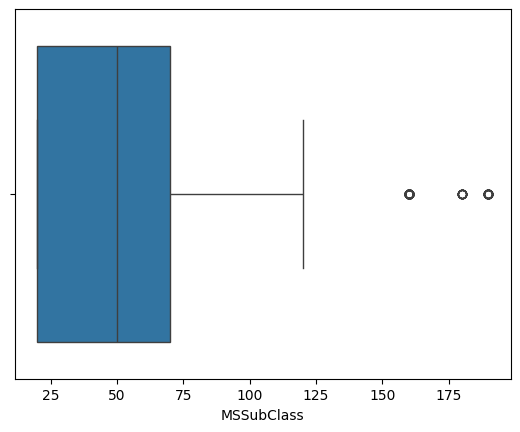

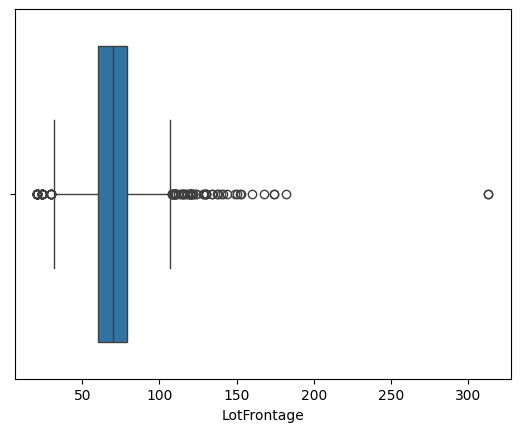

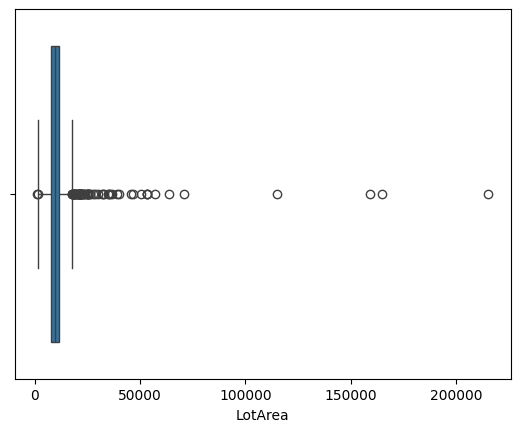

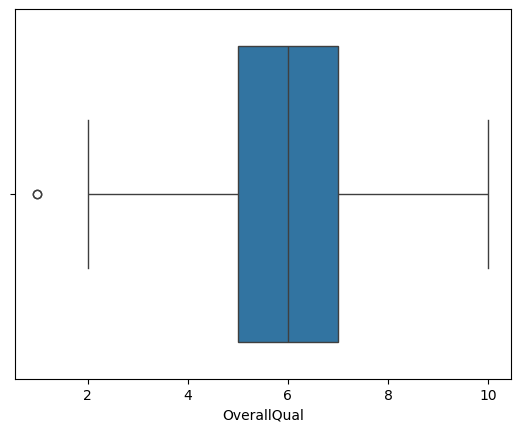

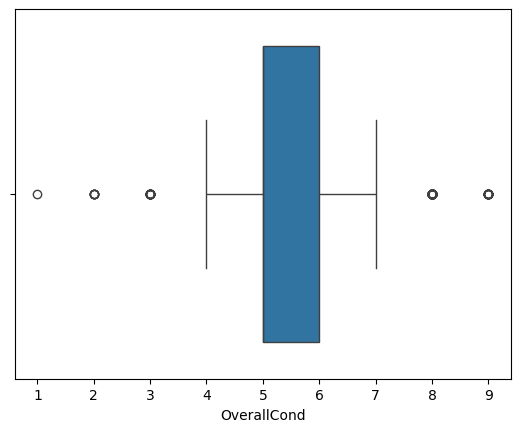

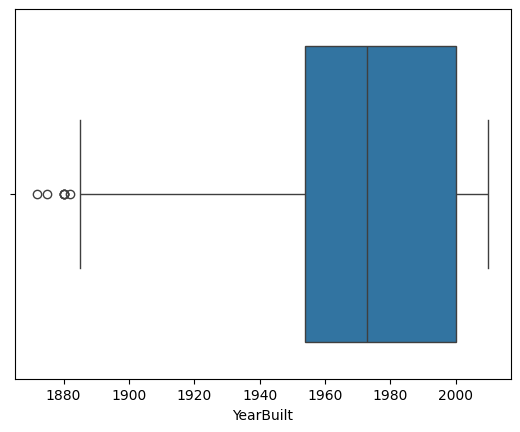

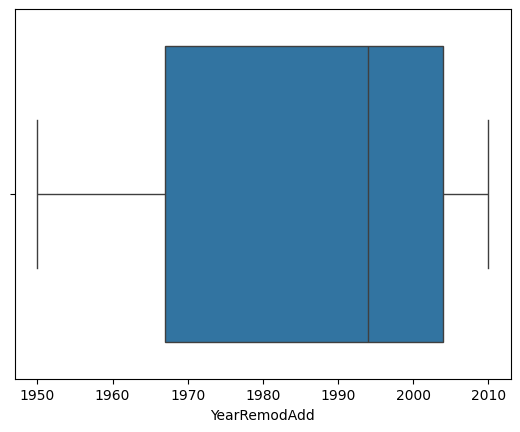

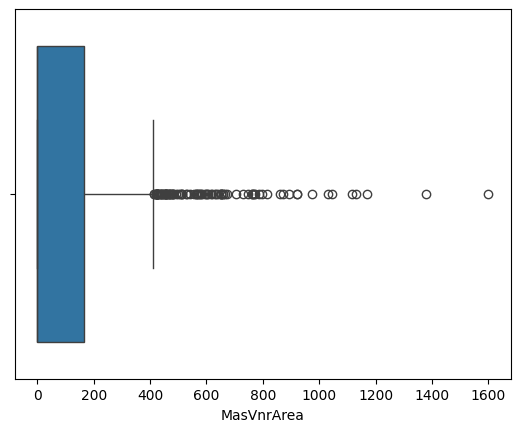

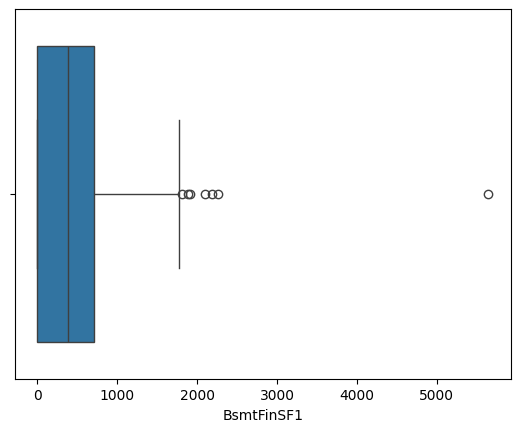

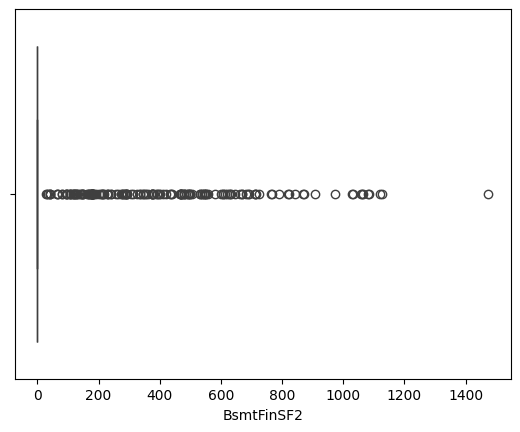

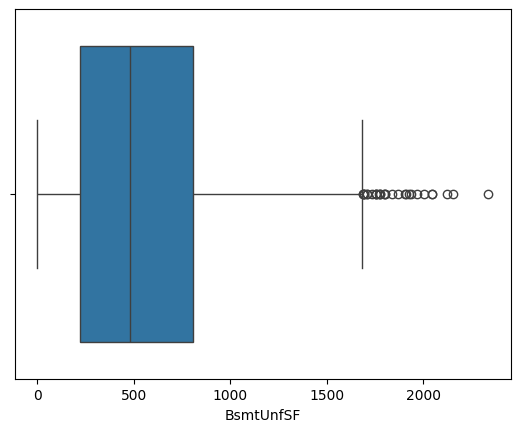

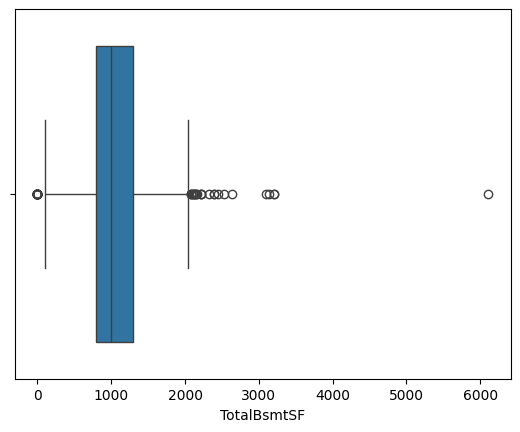

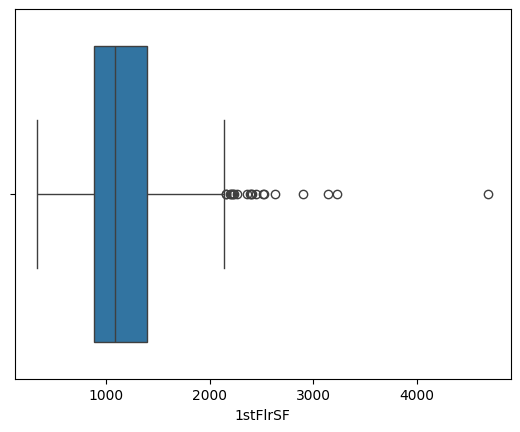

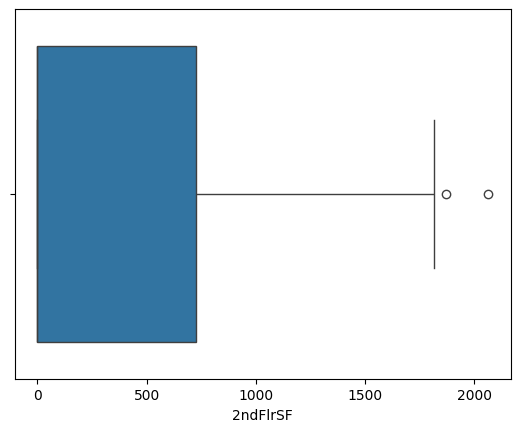

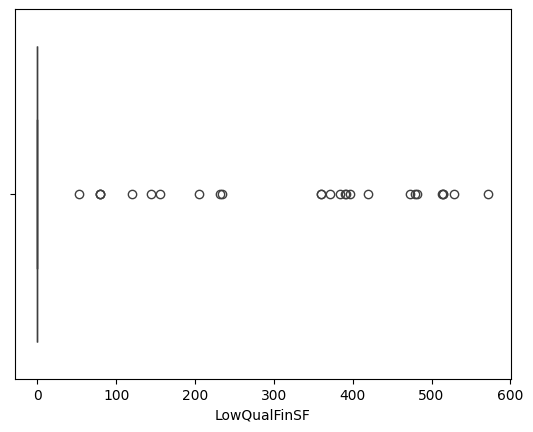

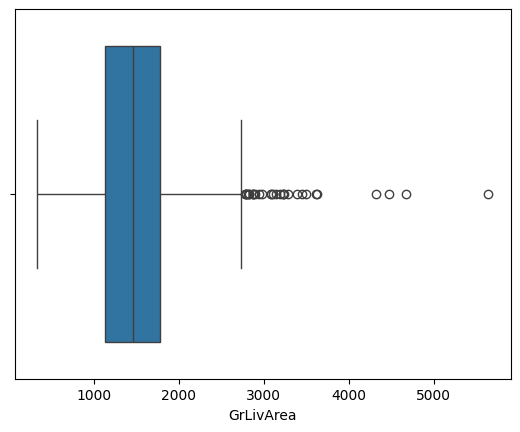

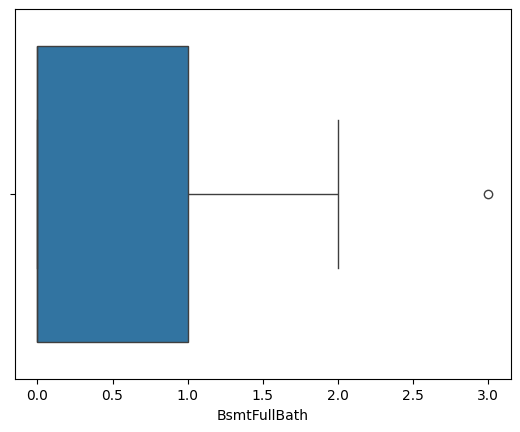

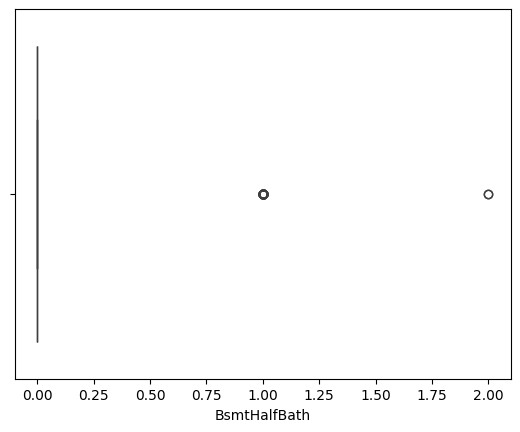

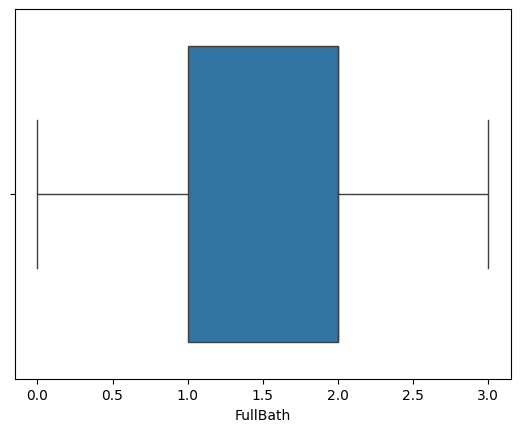

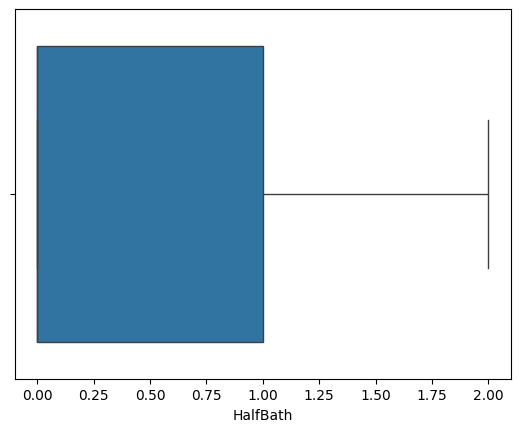

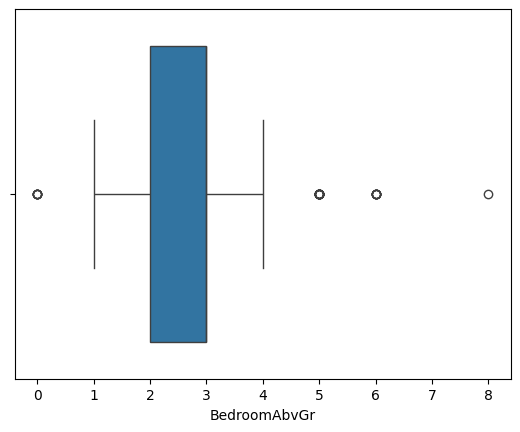

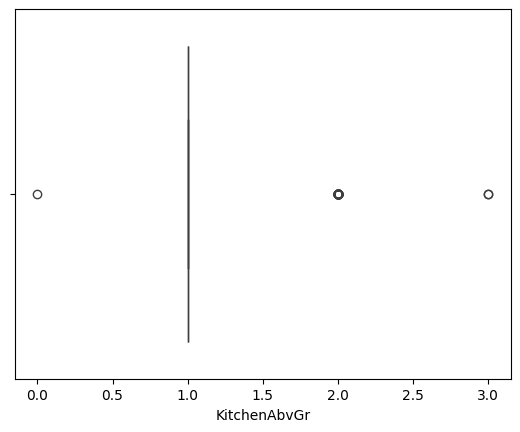

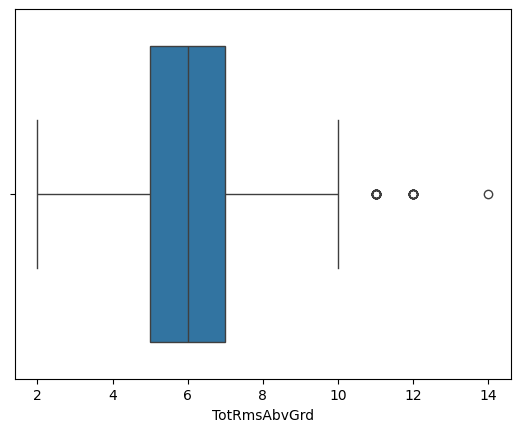

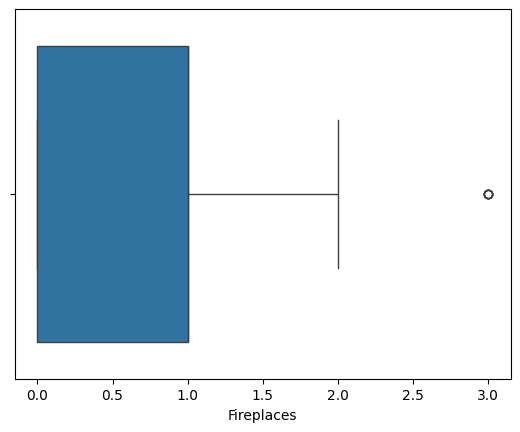

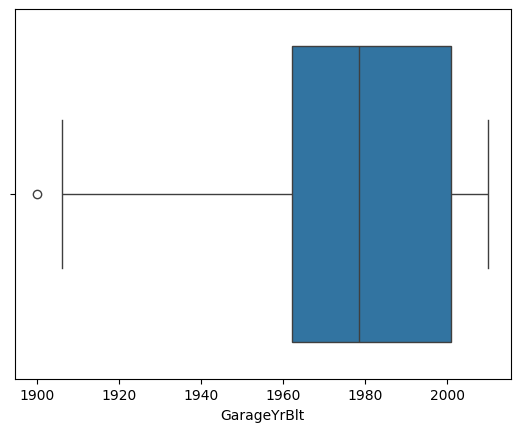

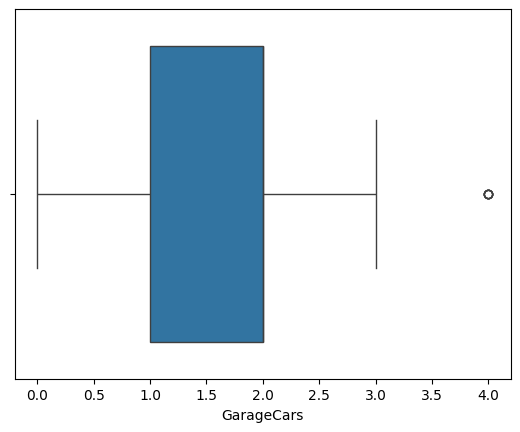

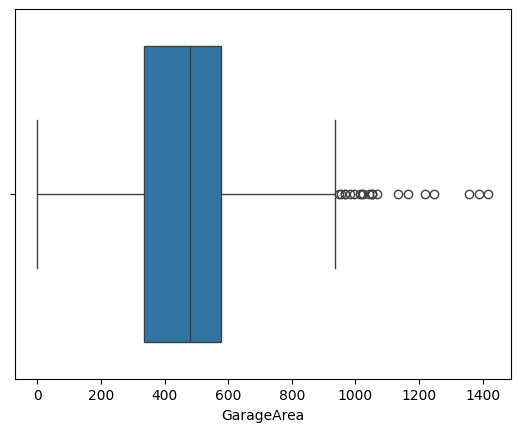

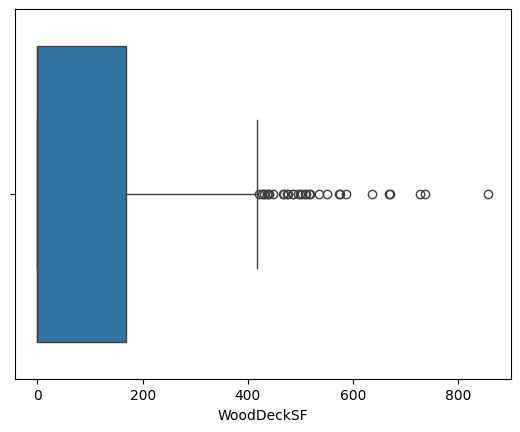

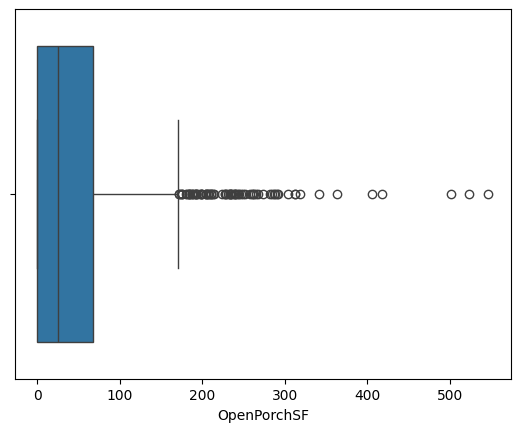

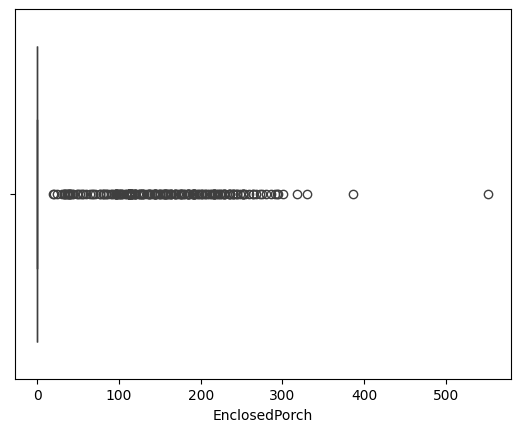

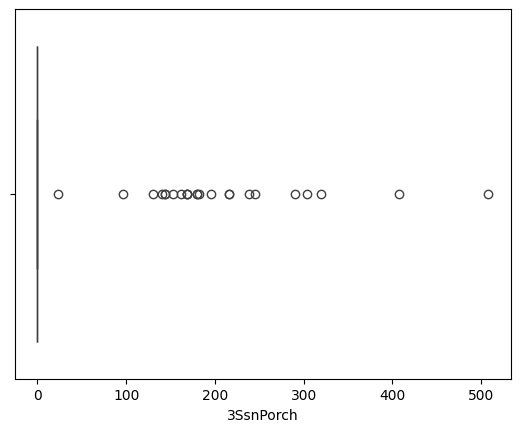

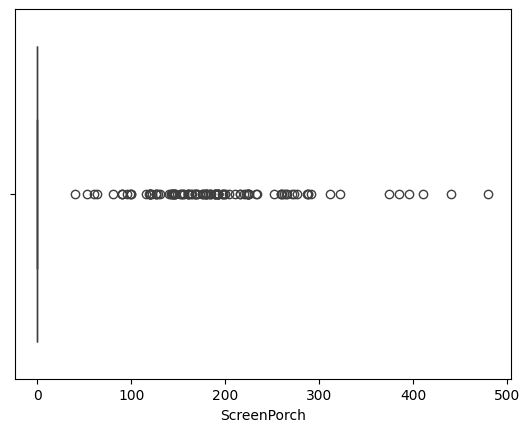

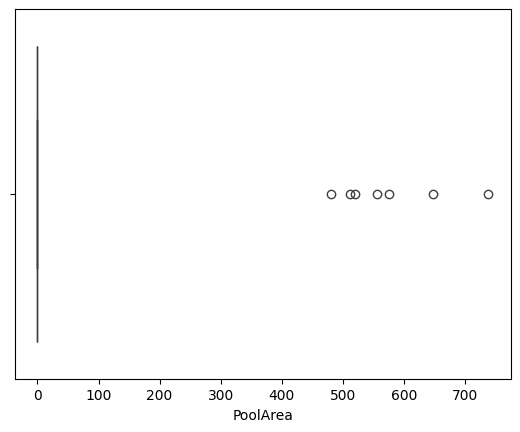

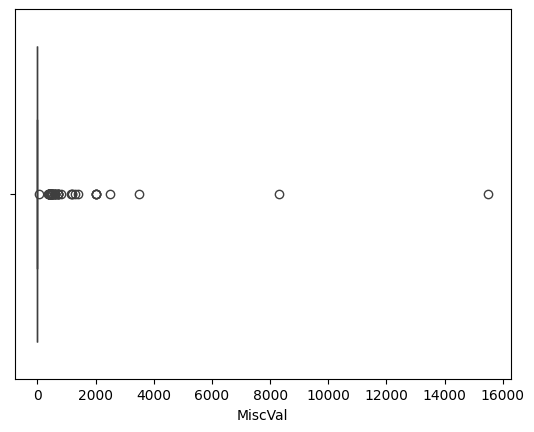

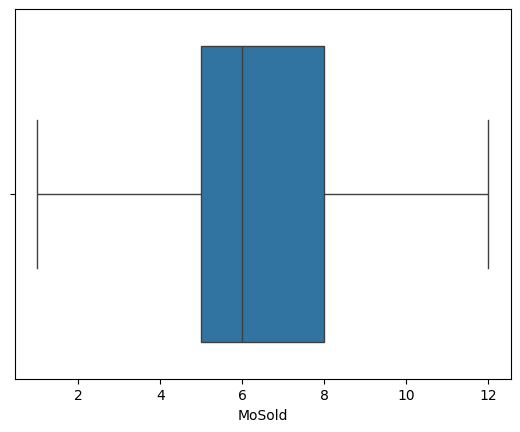

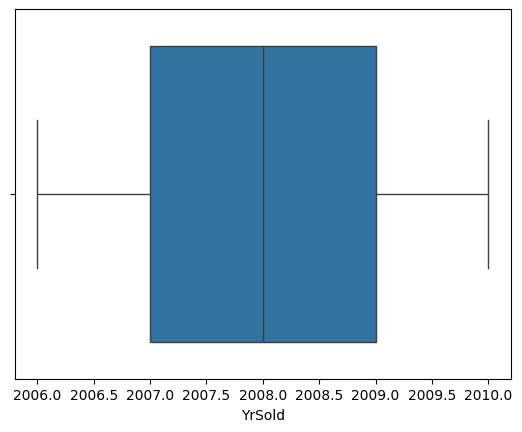

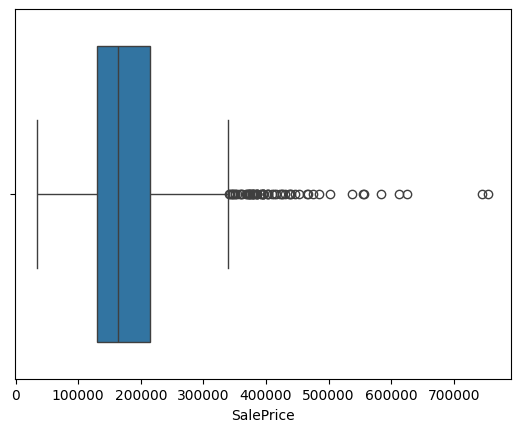

In [110]:
# Check for outliers in numerical variables
import seaborn as sns
import matplotlib.pyplot as plt

for col in numerical_columns:
  sns.boxplot(x=df_train[col])
  plt.show()

In [112]:
#get outlier count

outlier_count = {}
for col in numerical_columns:
# Calculate the interquartile range (IQR)
  q1 = df_train[col].quantile(0.25)
  q3 = df_train[col].quantile(0.75)
  iqr = q3 - q1

# Calculate the lower and upper bounds
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

# Identify outliers
  outliers = [x for x in df_train[col] if x < lower_bound or x > upper_bound]

# Count the outliers
  outlier_count[col] = len(df_train[~((df_train[col] >= lower_bound) & (df_train[col] <= upper_bound))])

print(outlier_count)


{'MSSubClass': 103, 'LotFrontage': 106, 'LotArea': 69, 'OverallQual': 2, 'OverallCond': 125, 'YearBuilt': 7, 'YearRemodAdd': 0, 'MasVnrArea': 98, 'BsmtFinSF1': 7, 'BsmtFinSF2': 167, 'BsmtUnfSF': 29, 'TotalBsmtSF': 61, '1stFlrSF': 20, '2ndFlrSF': 2, 'LowQualFinSF': 26, 'GrLivArea': 31, 'BsmtFullBath': 1, 'BsmtHalfBath': 82, 'FullBath': 0, 'HalfBath': 0, 'BedroomAbvGr': 35, 'KitchenAbvGr': 68, 'TotRmsAbvGrd': 30, 'Fireplaces': 5, 'GarageYrBlt': 1, 'GarageCars': 5, 'GarageArea': 21, 'WoodDeckSF': 32, 'OpenPorchSF': 77, 'EnclosedPorch': 208, '3SsnPorch': 24, 'ScreenPorch': 116, 'PoolArea': 7, 'MiscVal': 52, 'MoSold': 0, 'YrSold': 0, 'SalePrice': 61}


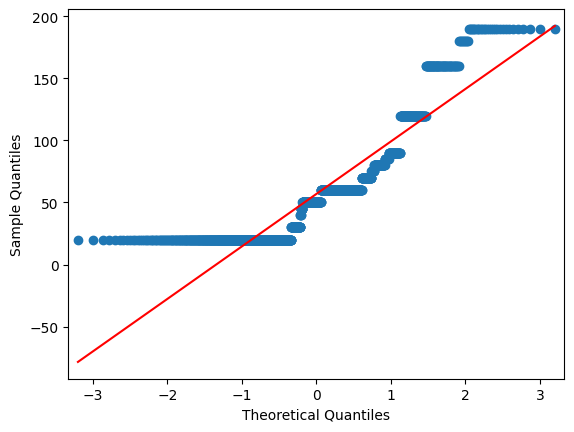

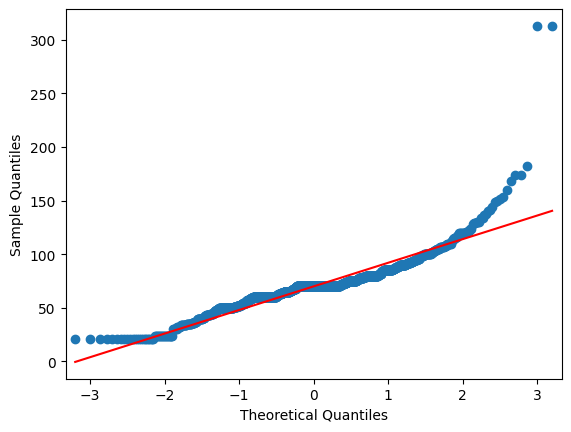

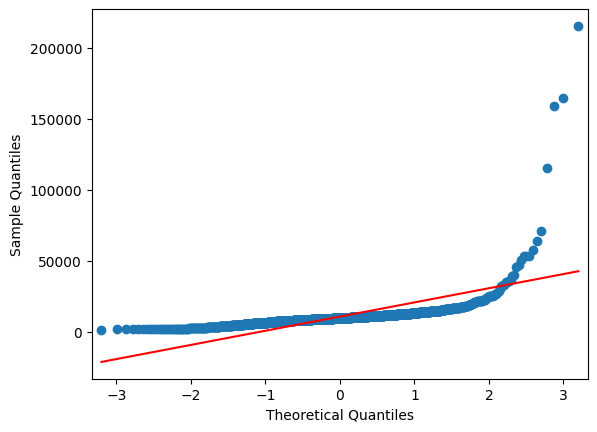

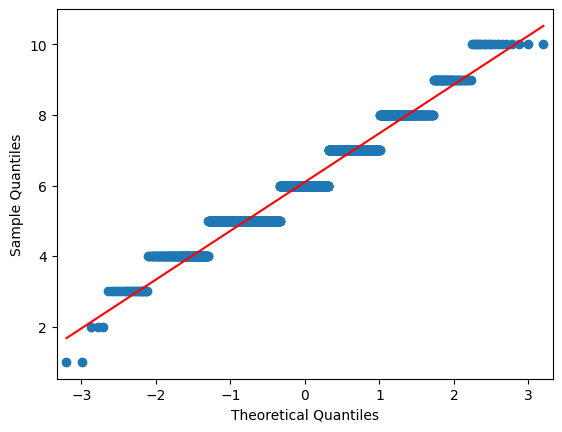

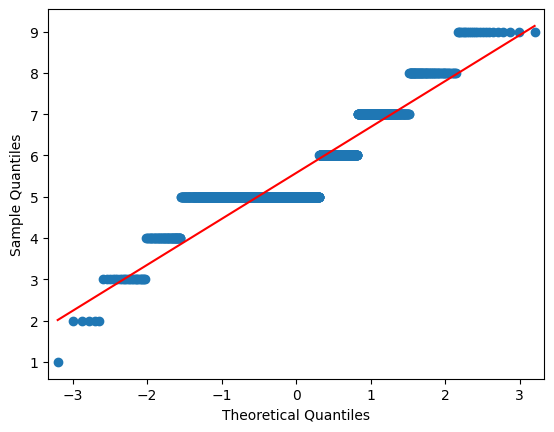

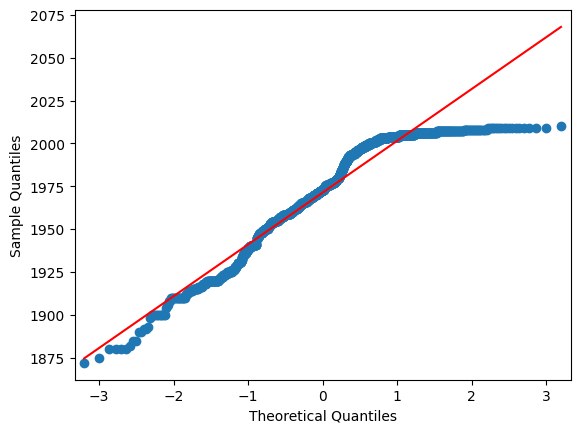

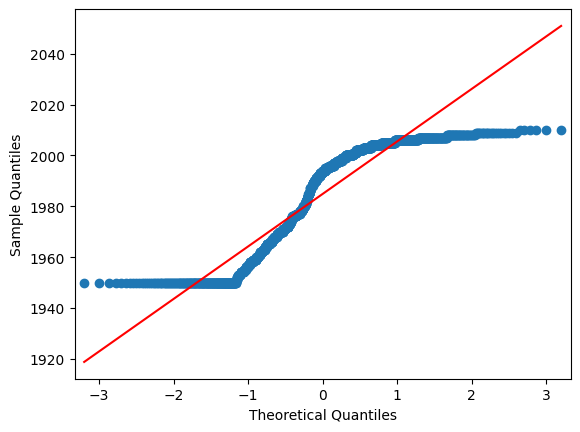

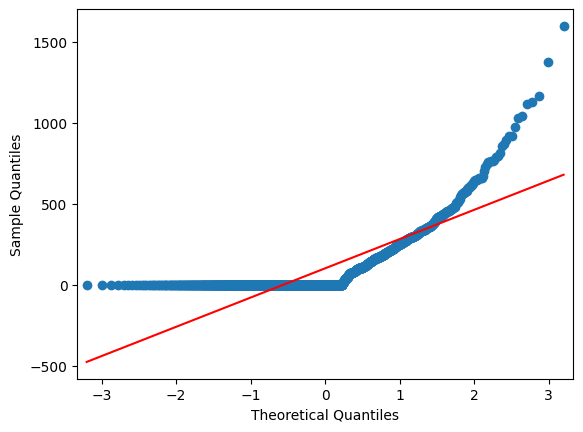

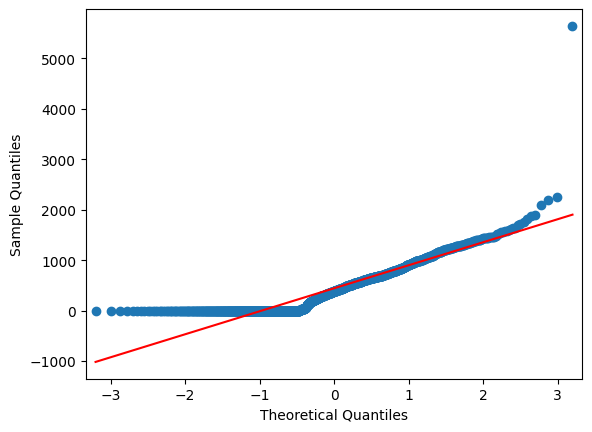

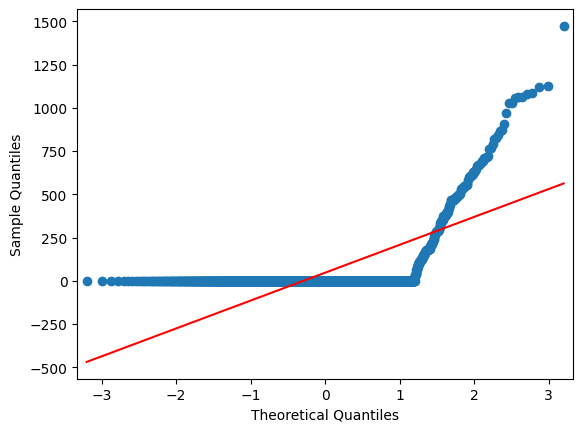

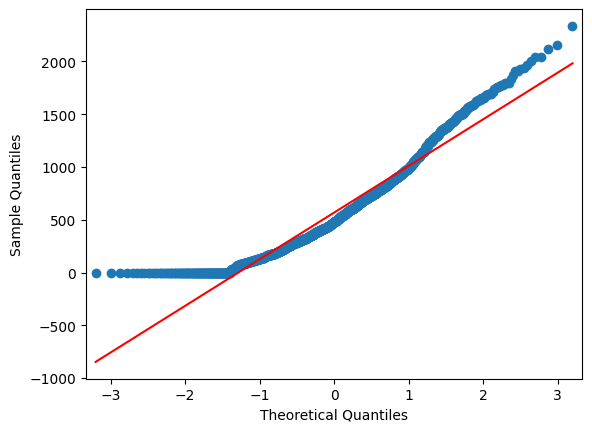

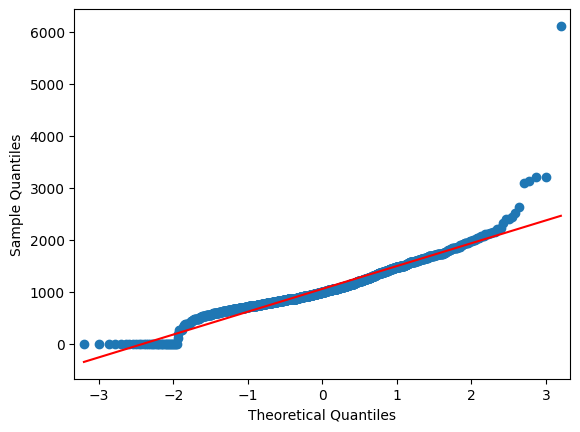

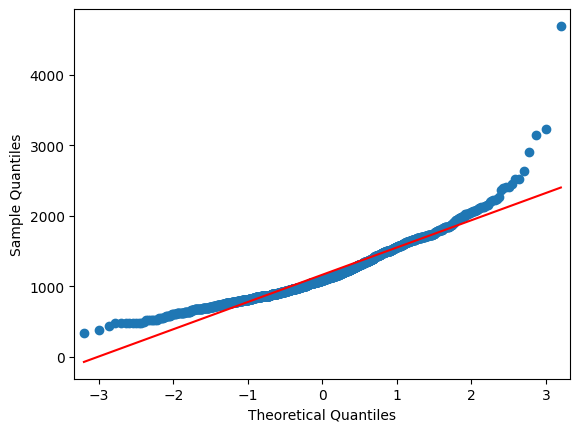

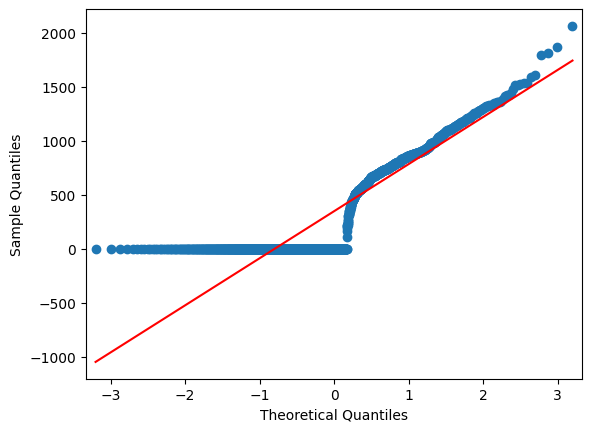

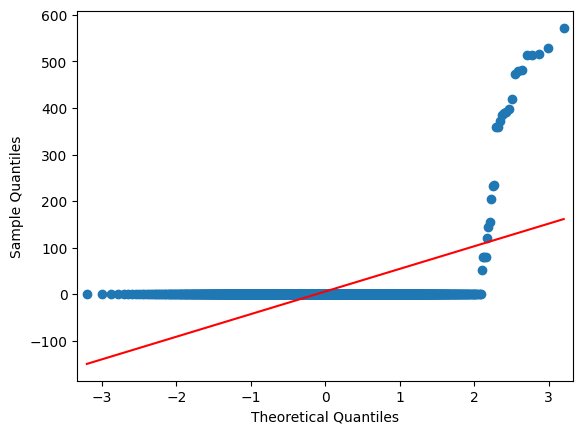

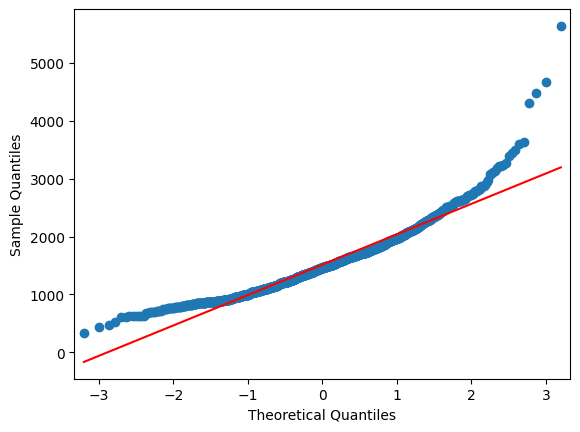

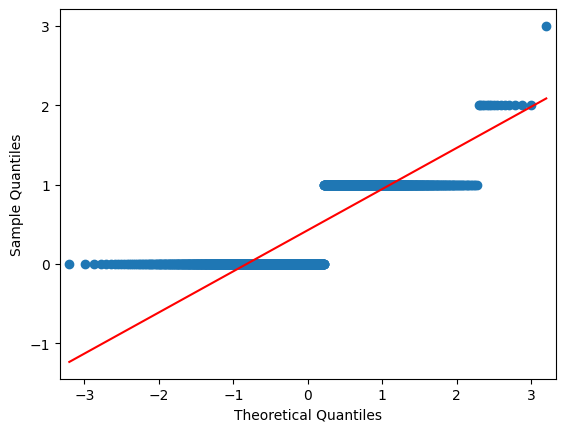

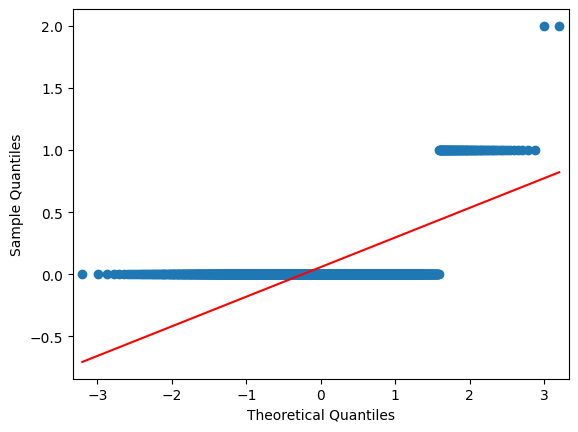

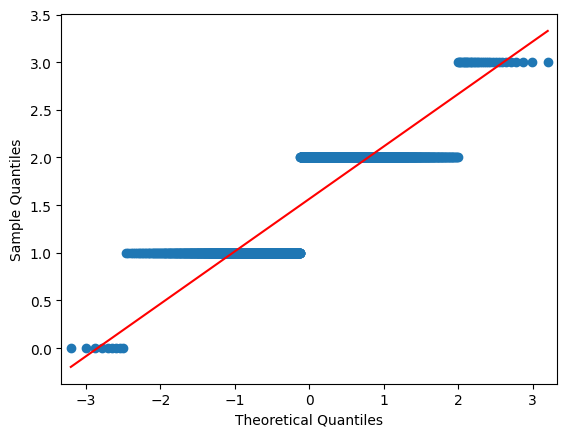

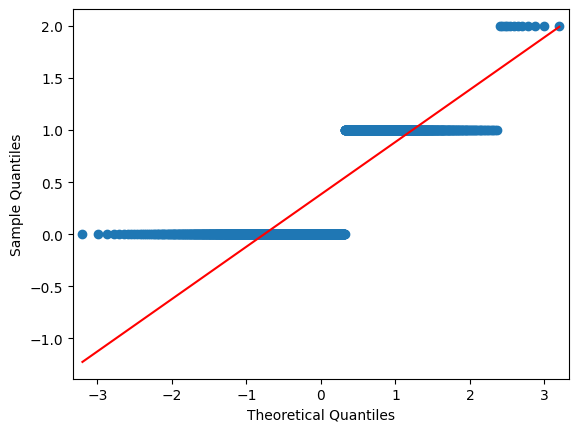

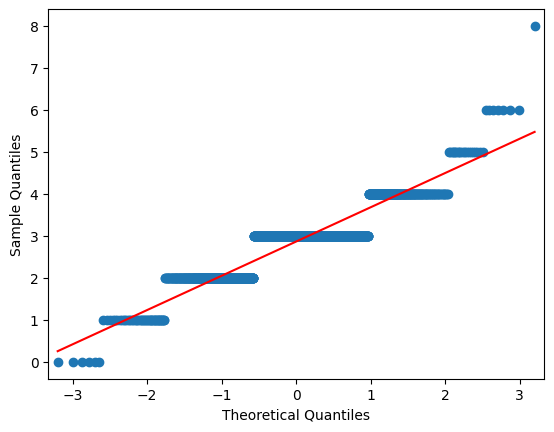

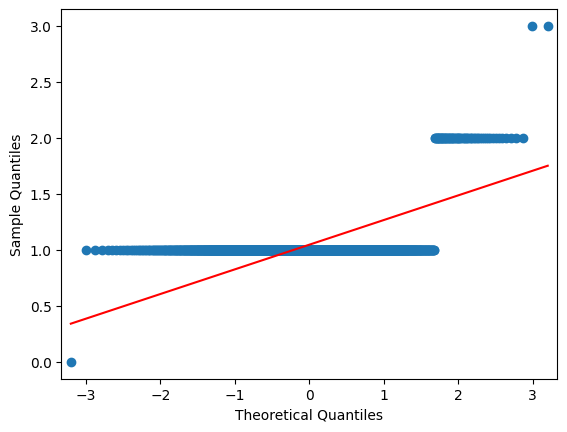

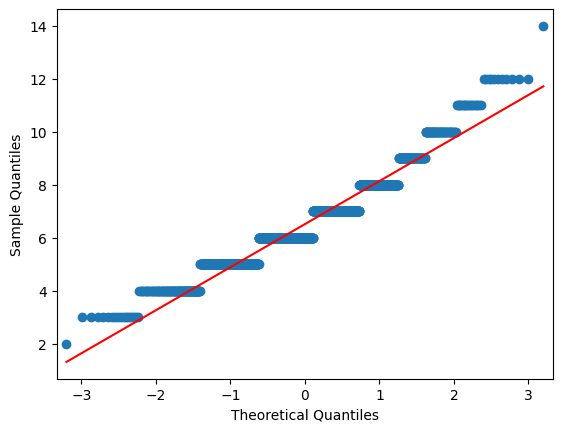

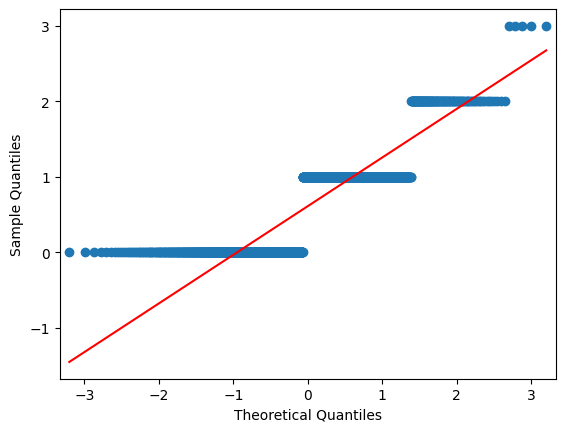

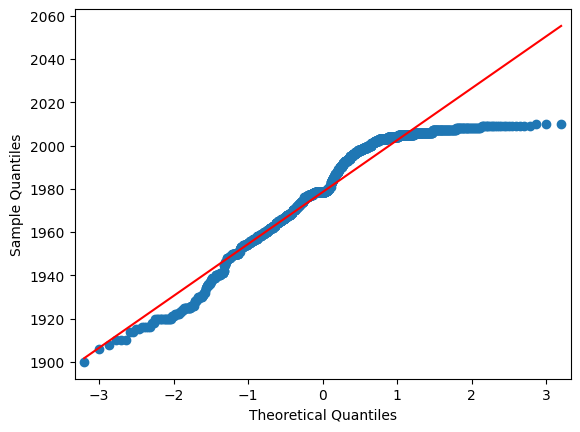

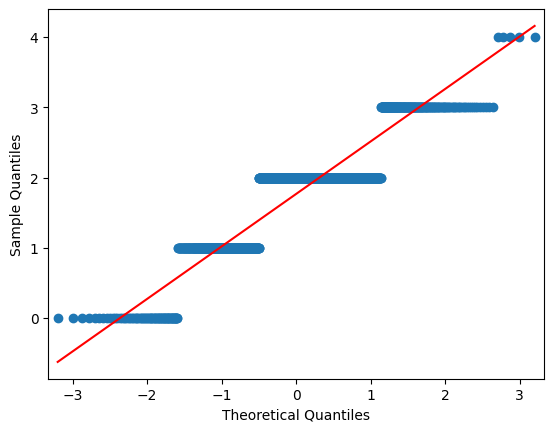

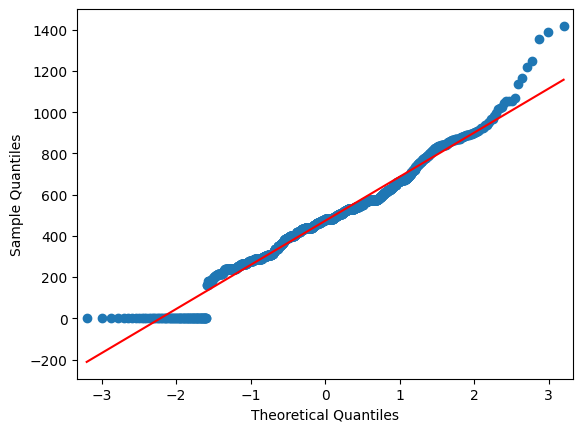

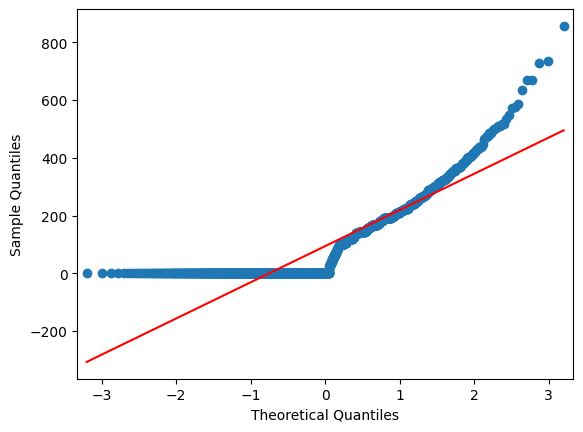

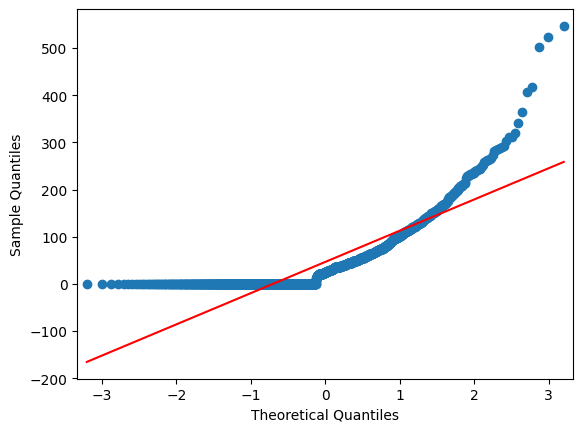

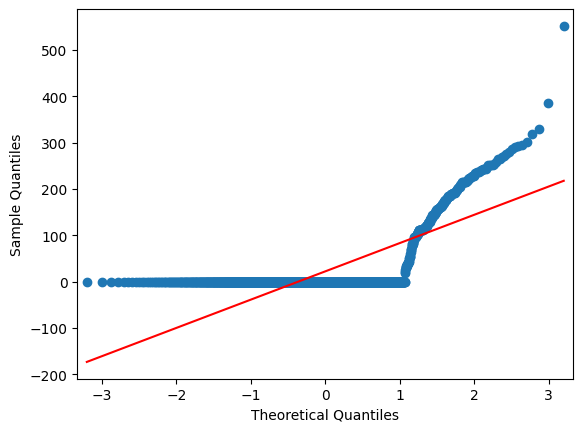

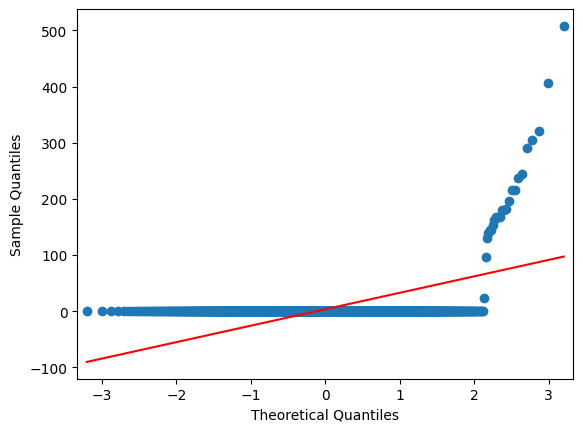

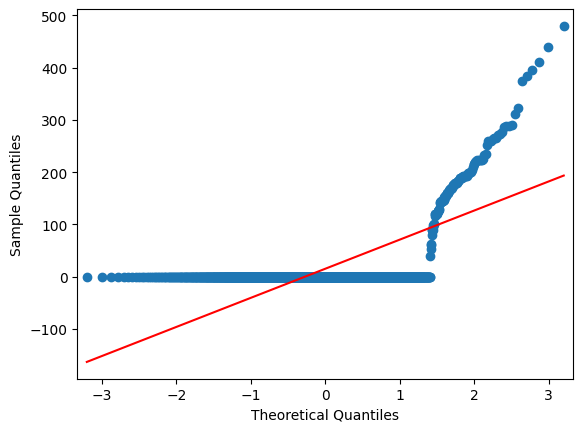

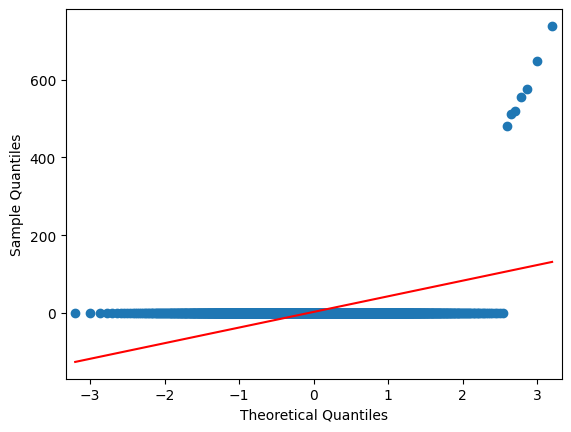

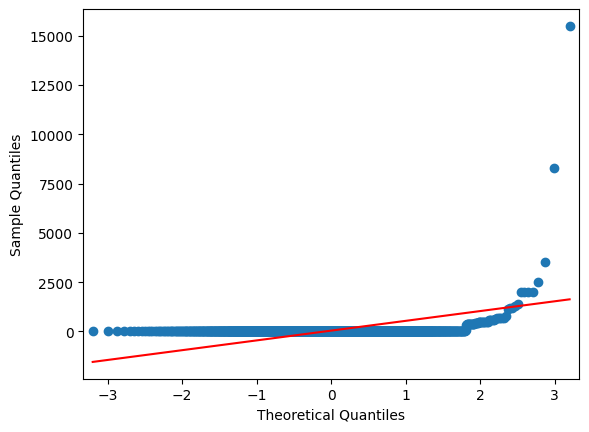

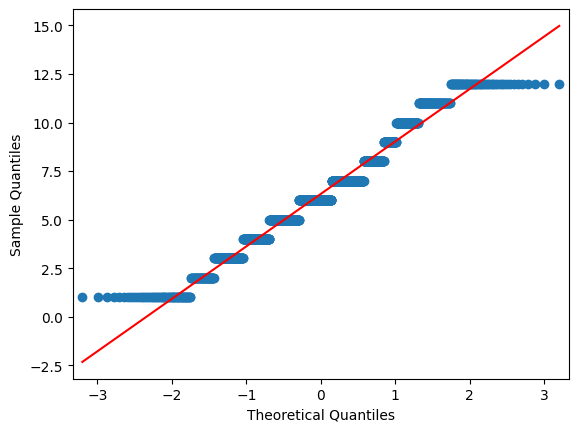

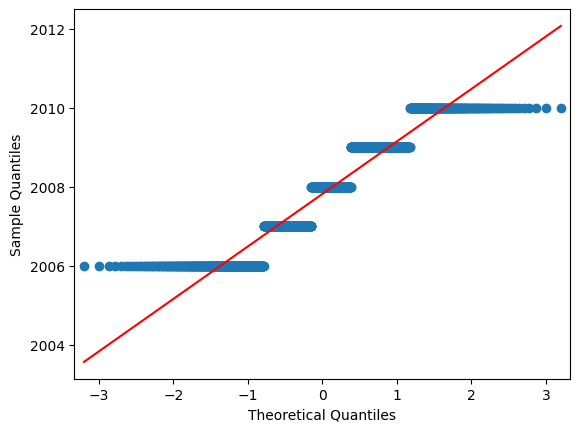

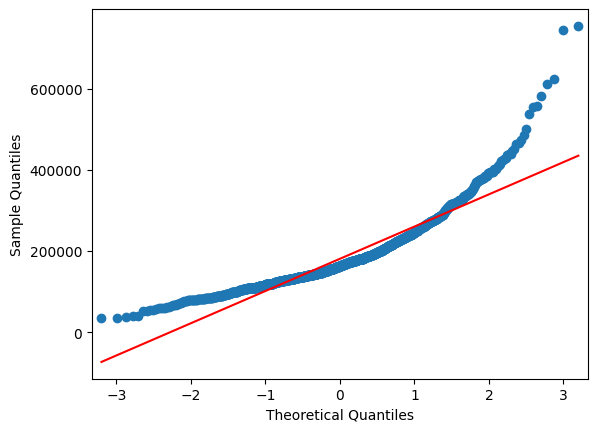

In [113]:
#What's the distribution of the dataset

import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
# Check for normality in numerical variables

for col in numerical_columns:
  sm.qqplot(df_train[col], line='s')
  plt.show()

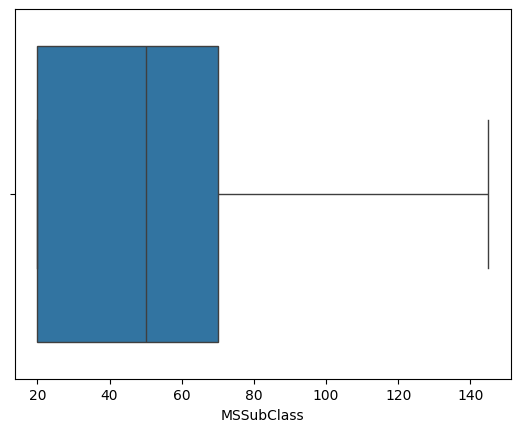

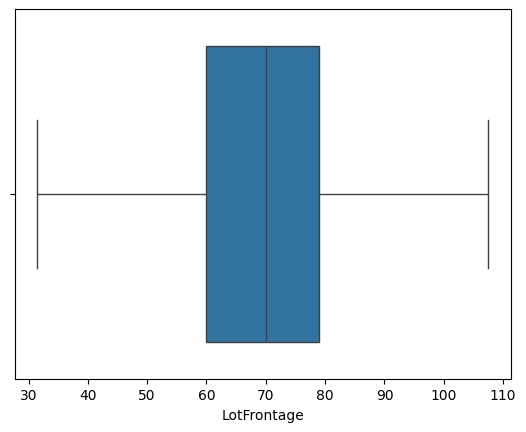

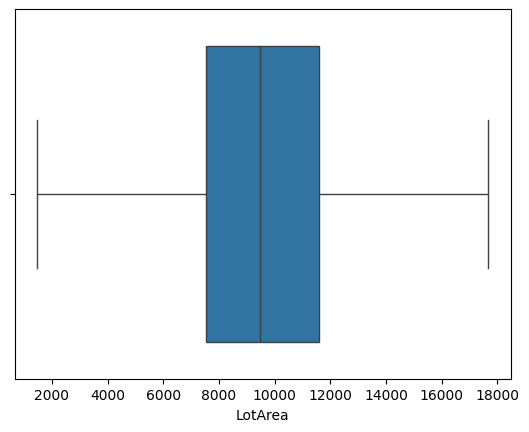

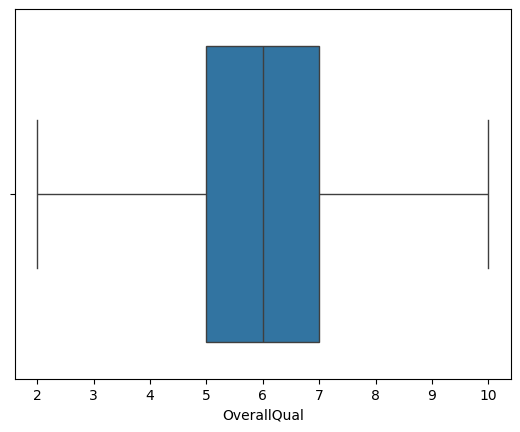

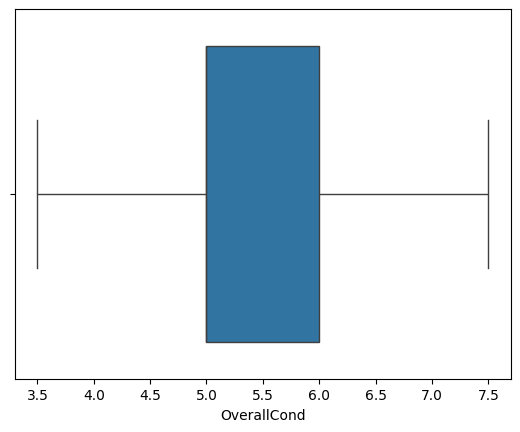

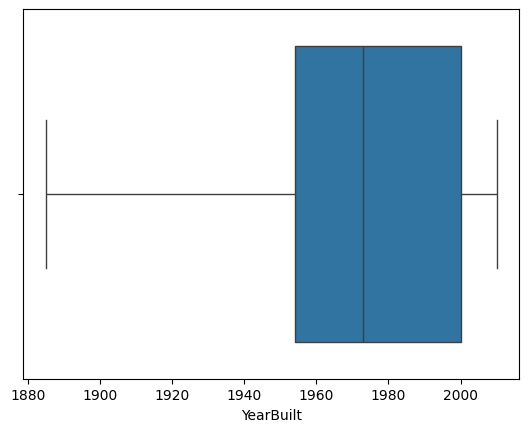

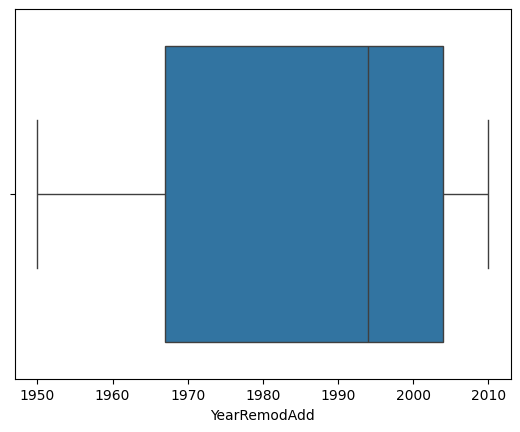

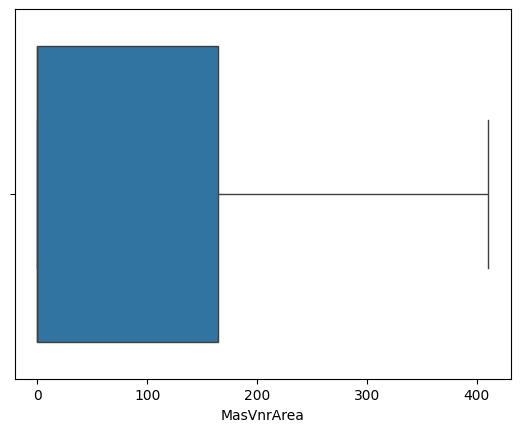

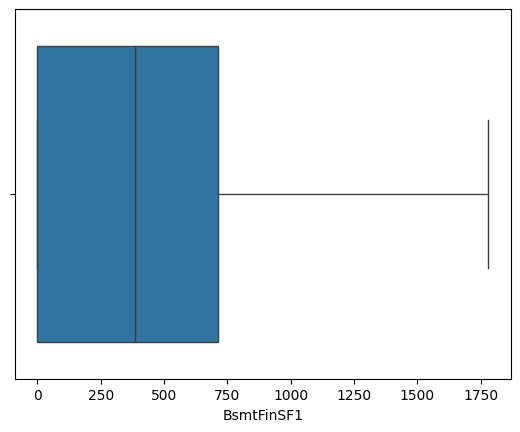

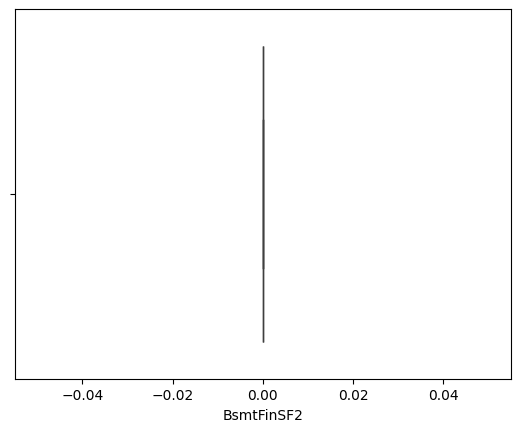

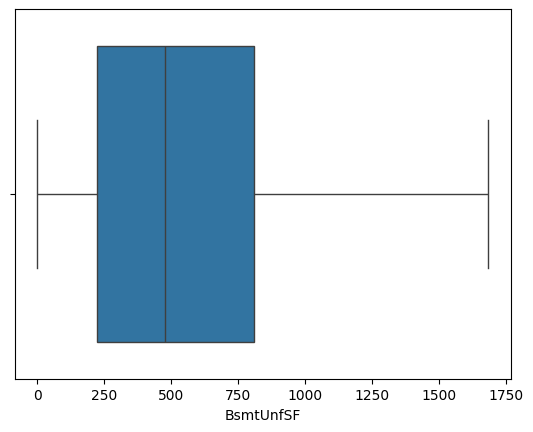

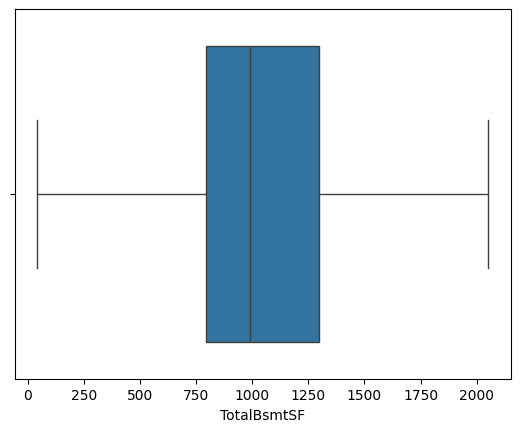

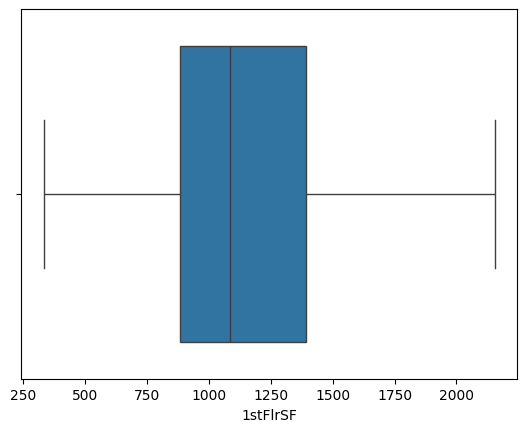

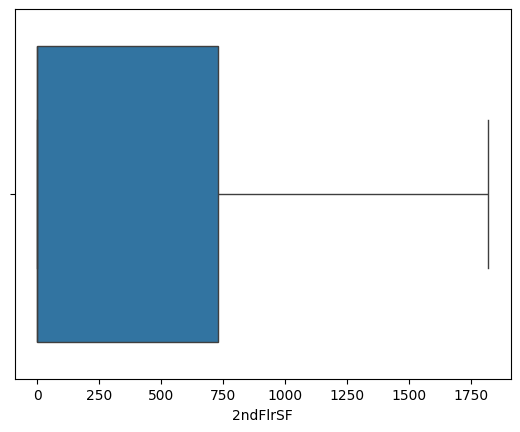

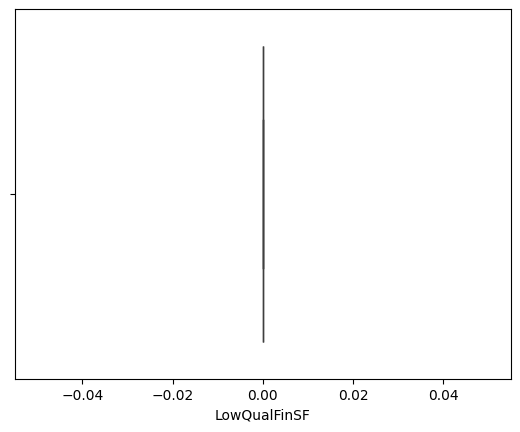

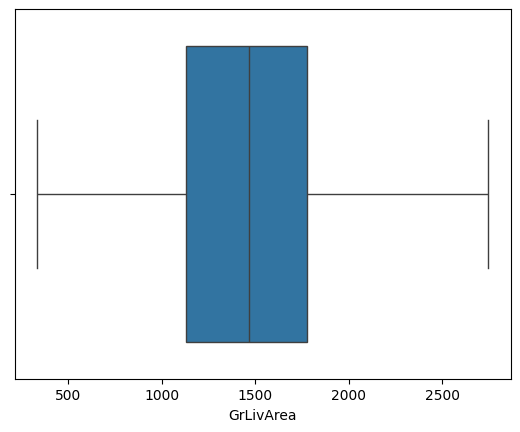

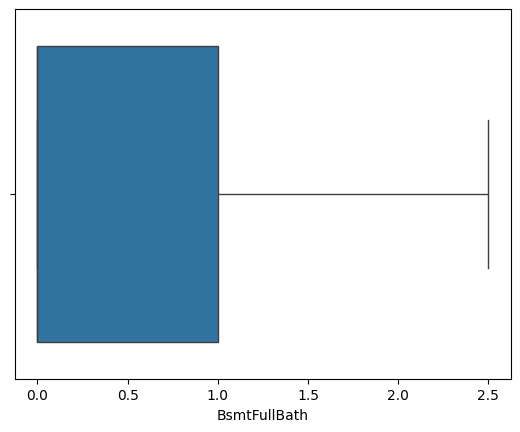

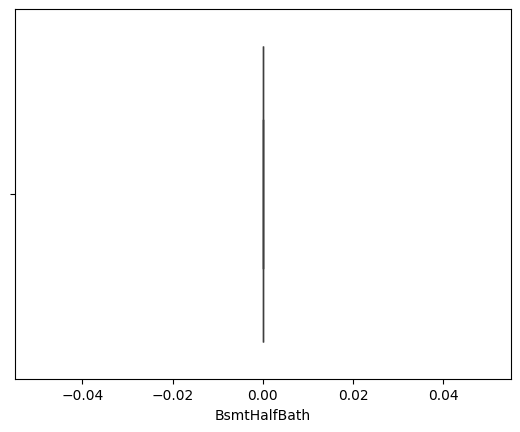

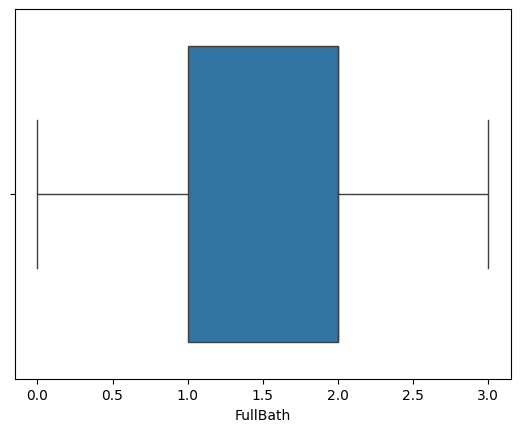

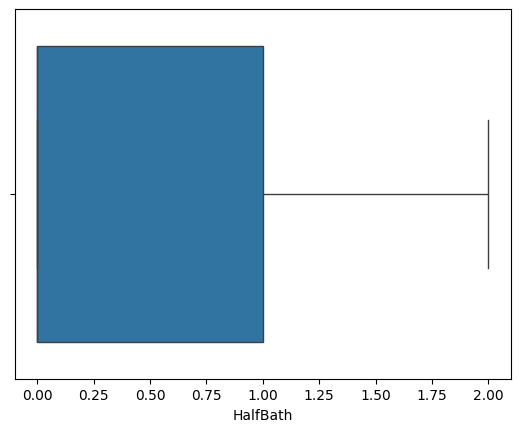

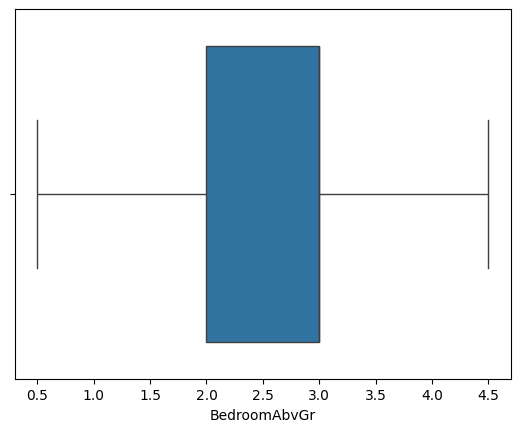

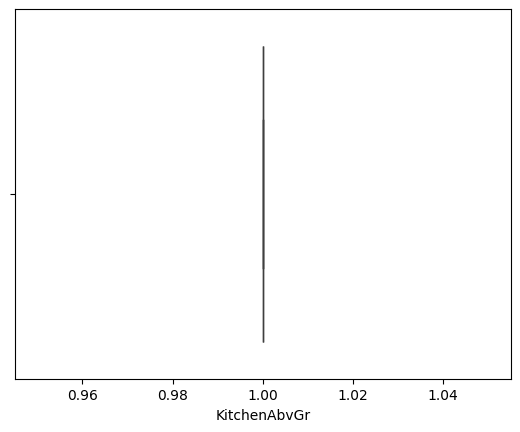

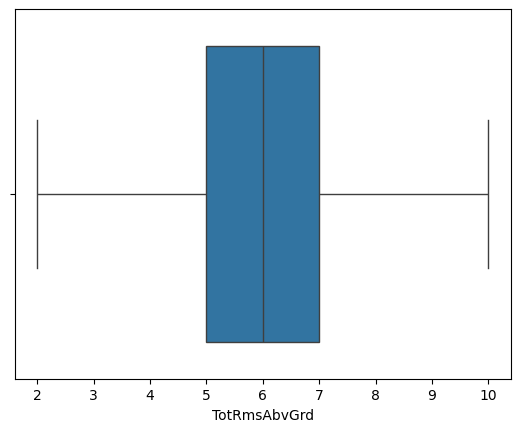

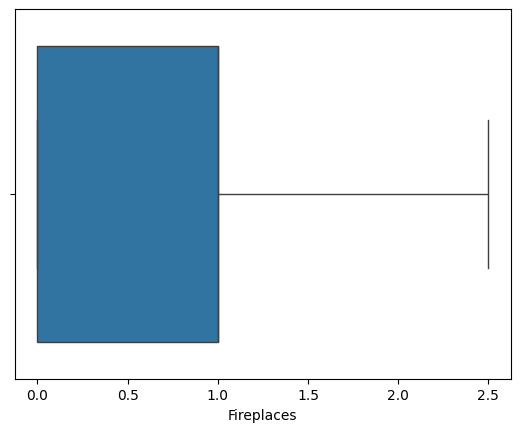

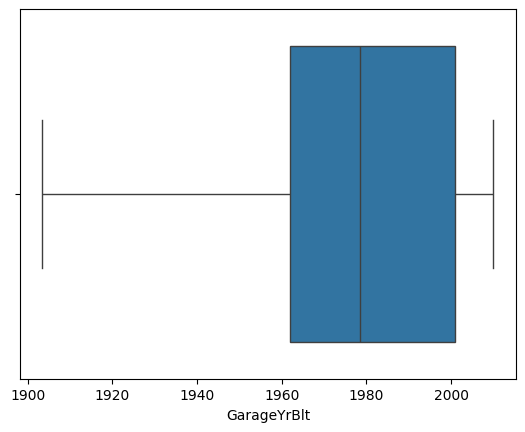

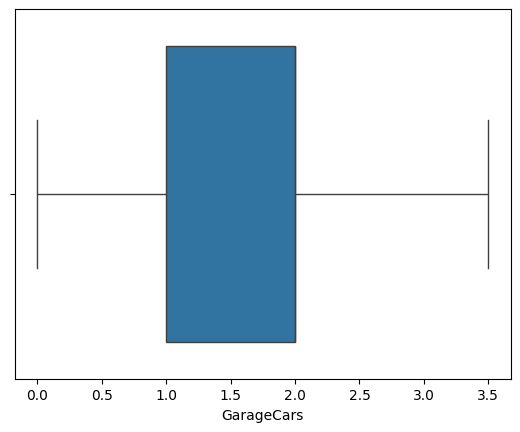

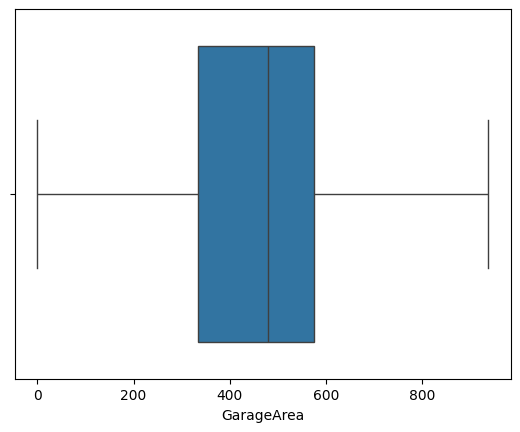

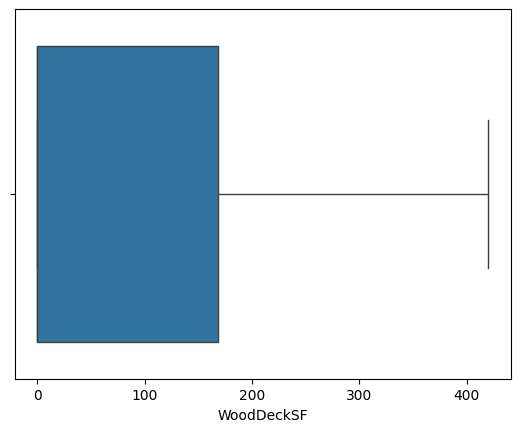

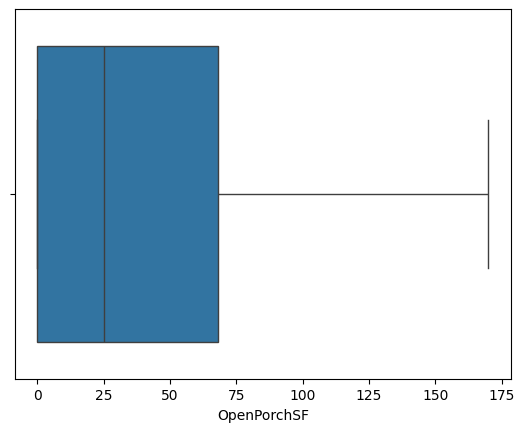

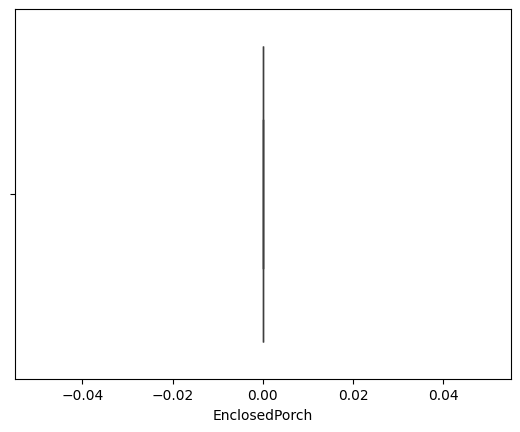

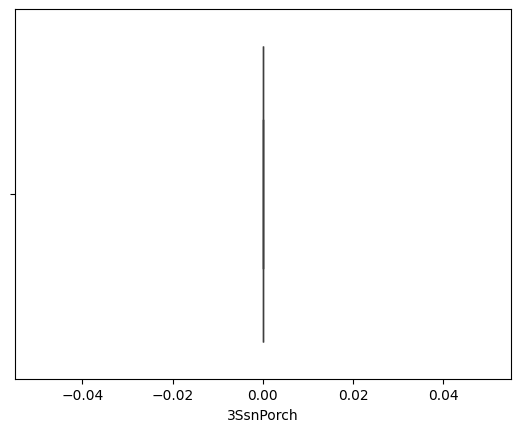

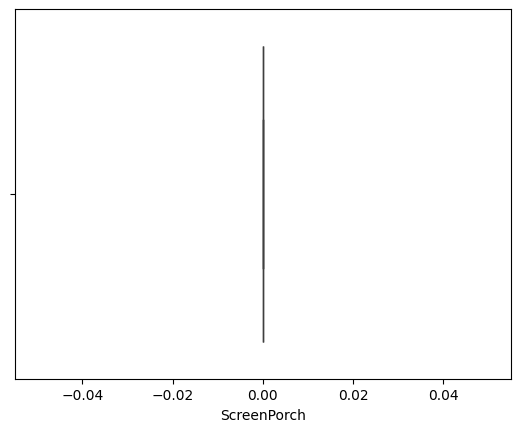

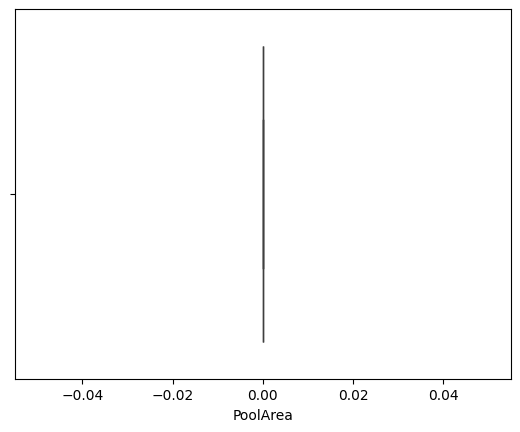

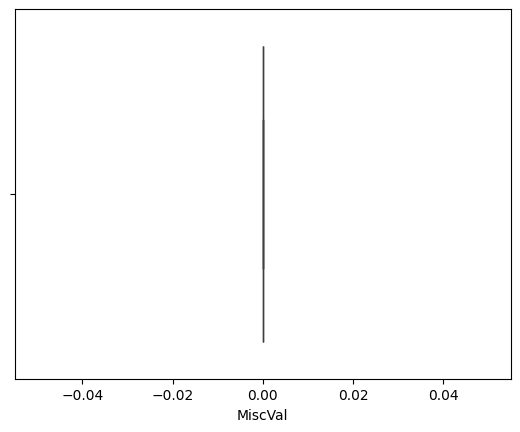

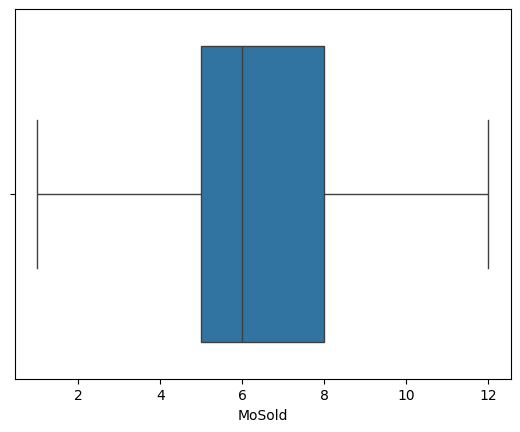

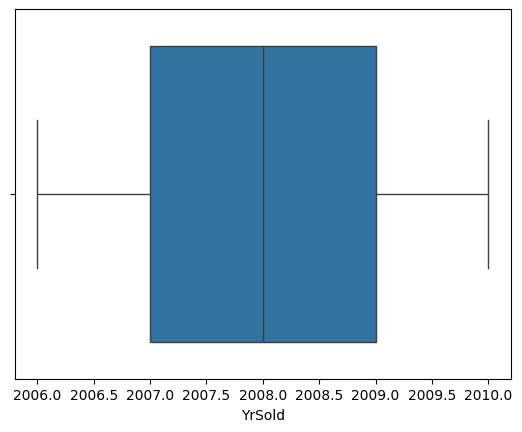

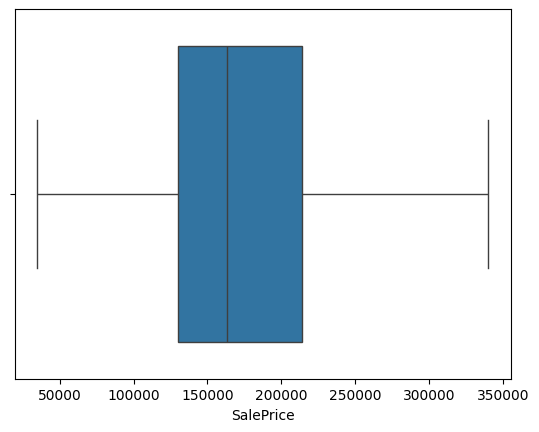

In [114]:
#remove outliers is 1.5 times the interquartile range (IQR)

import matplotlib.pyplot as plt
for col in numerical_columns:
  # Calculate the interquartile range (IQR)
  q1 = df_train[col].quantile(0.25)
  q3 = df_train[col].quantile(0.75)
  iqr = q3 - q1

  # Calculate the lower and upper bounds
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  # Replace outliers with the bounds
  df_train[col] = df_train[col].clip(lower=lower_bound, upper=upper_bound)

# Check for outliers in numerical variables

for col in numerical_columns:
  sns.boxplot(x=df_train[col])
  plt.show()


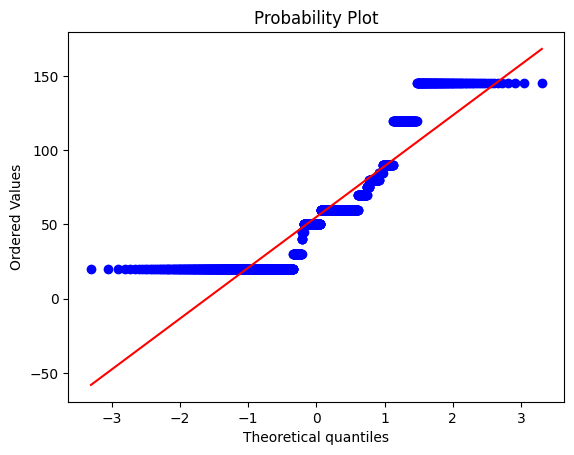

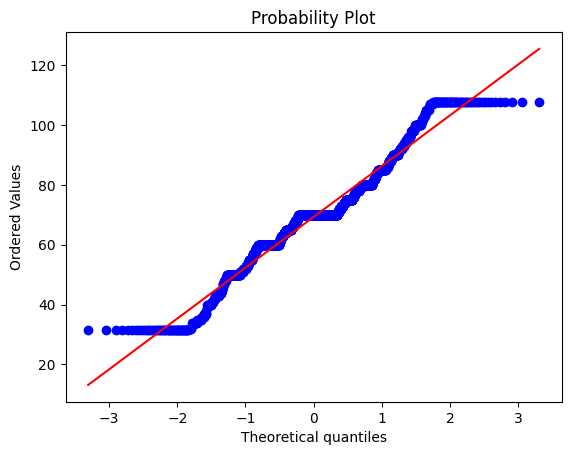

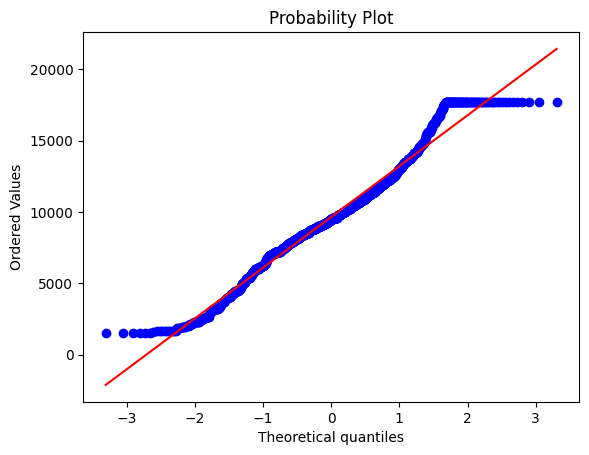

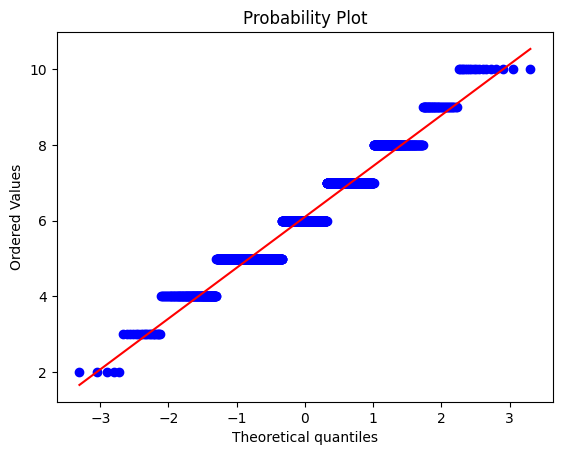

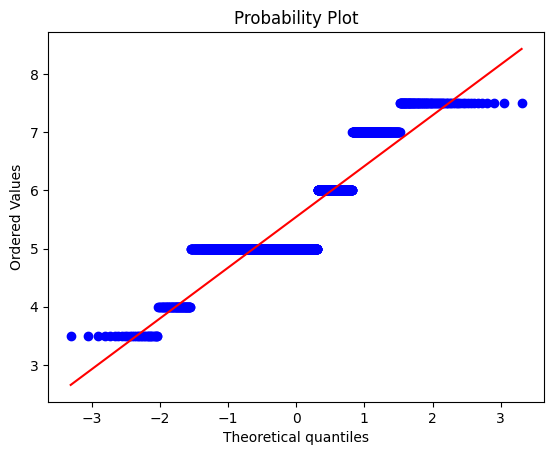

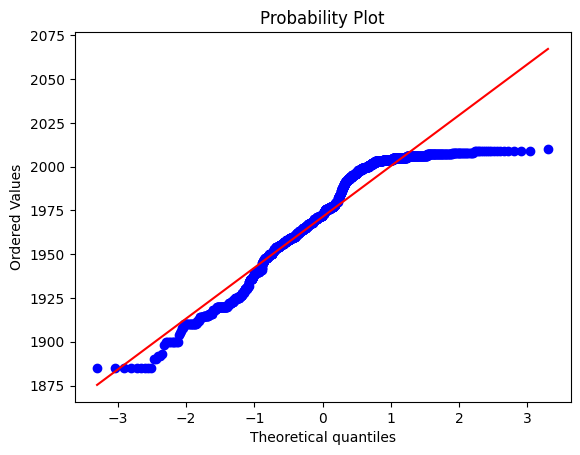

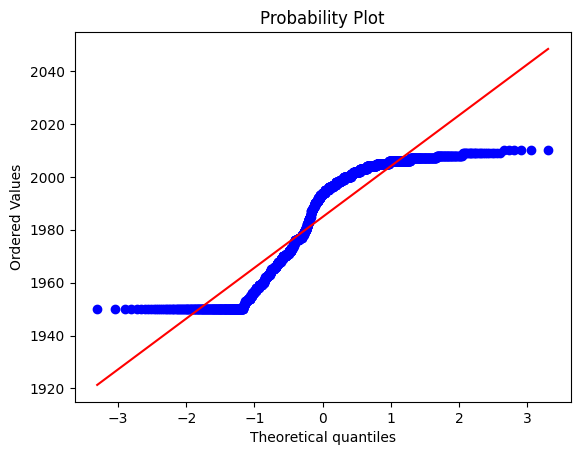

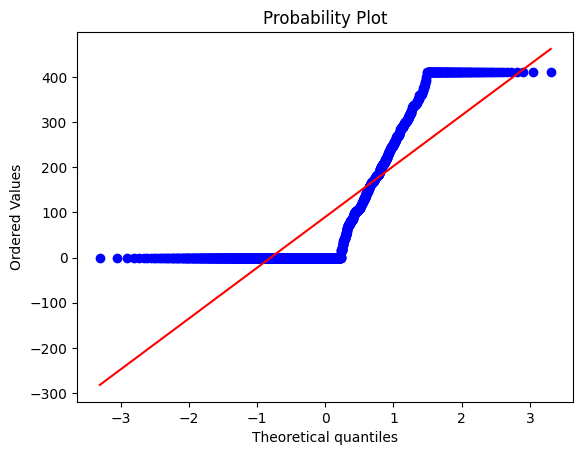

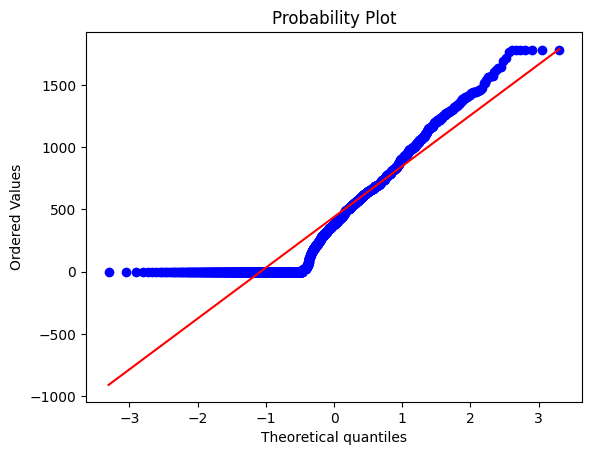

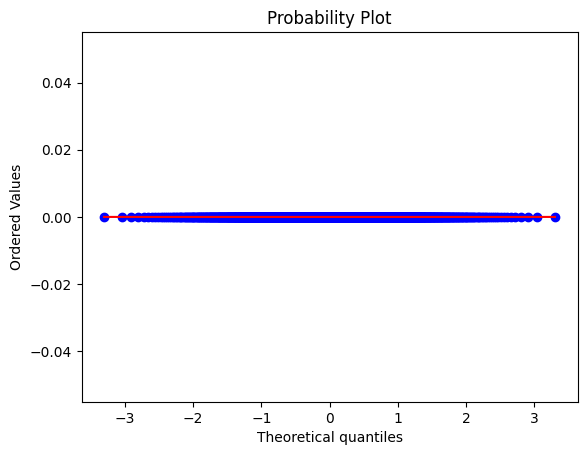

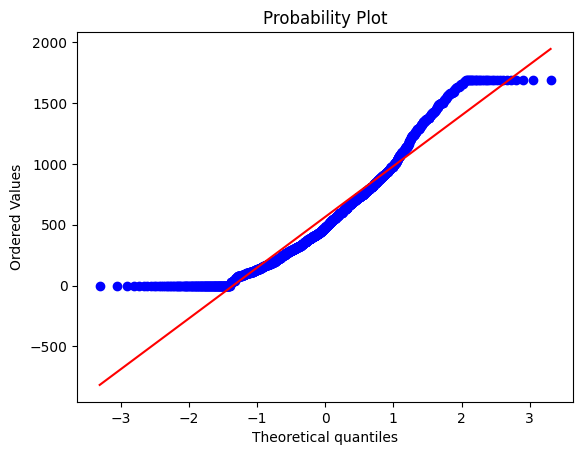

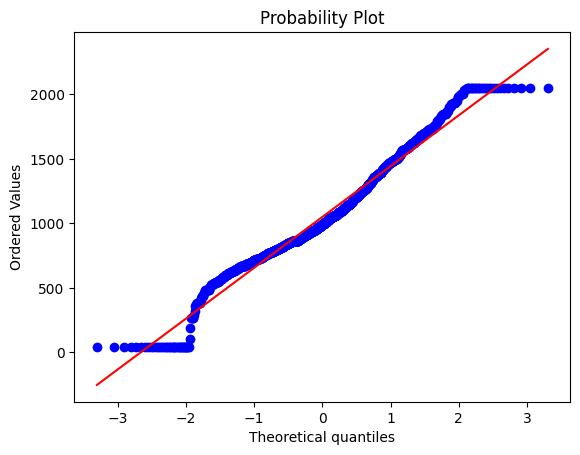

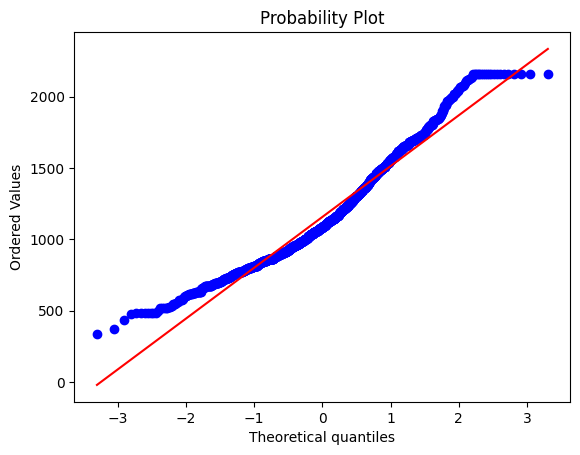

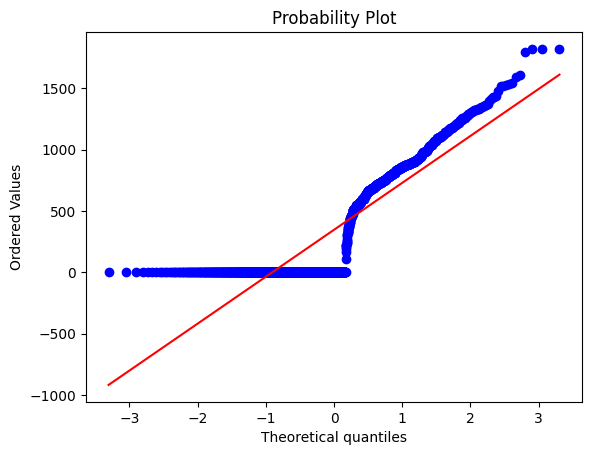

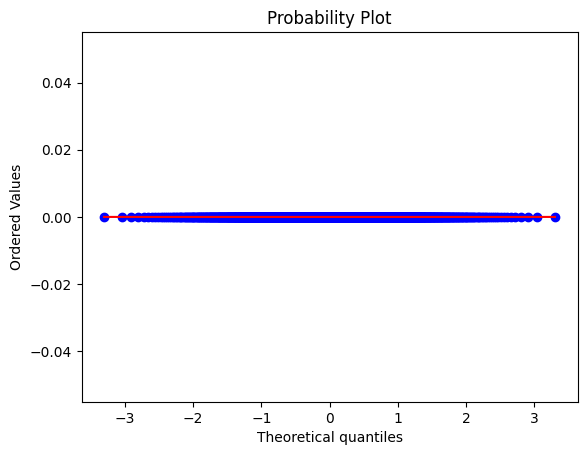

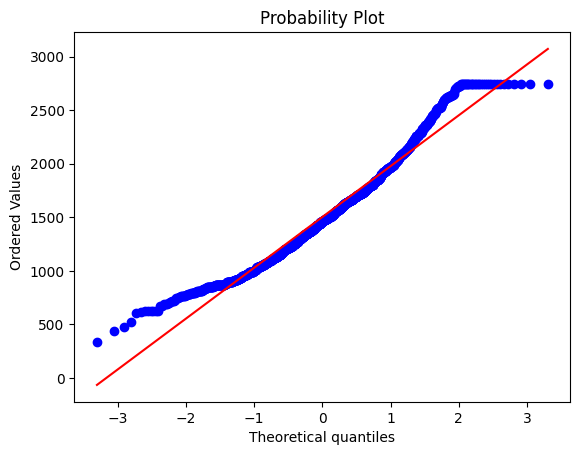

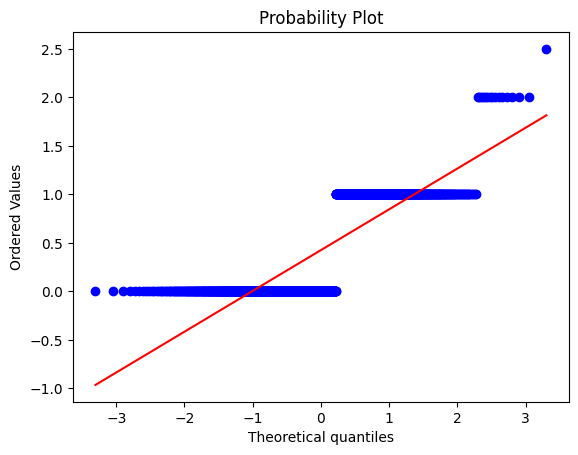

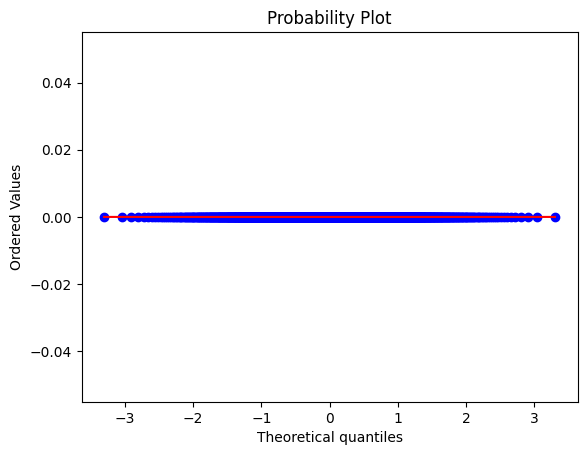

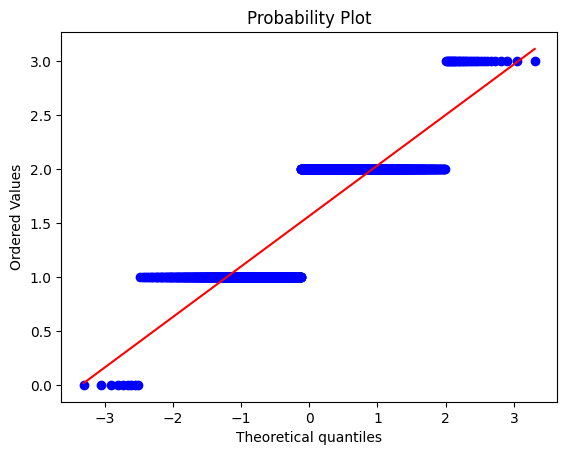

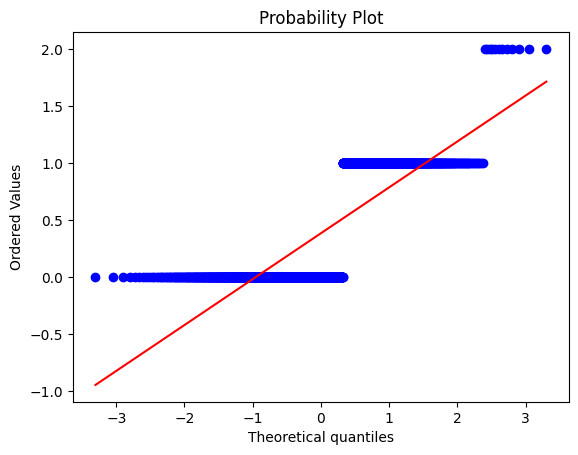

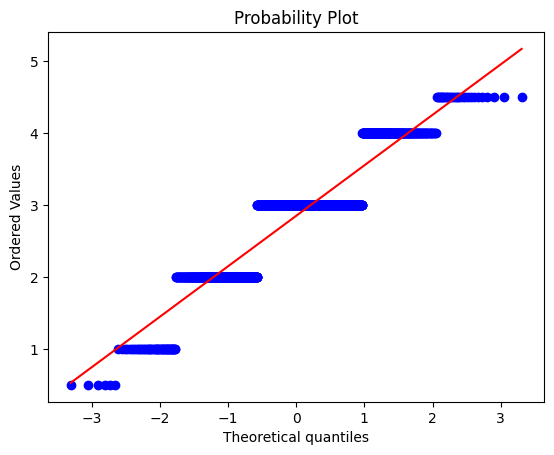

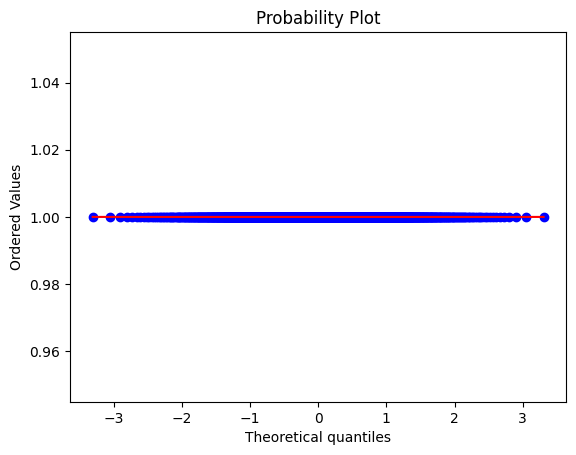

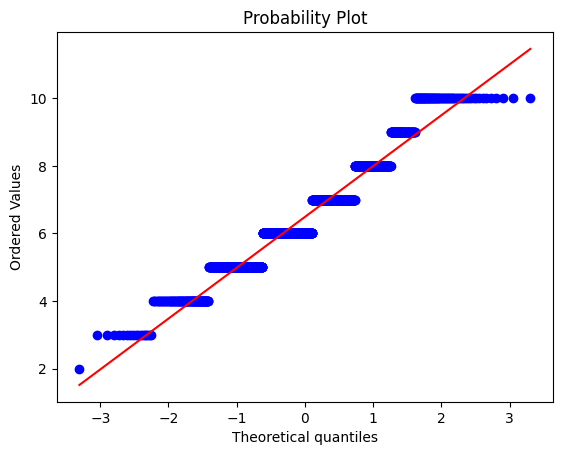

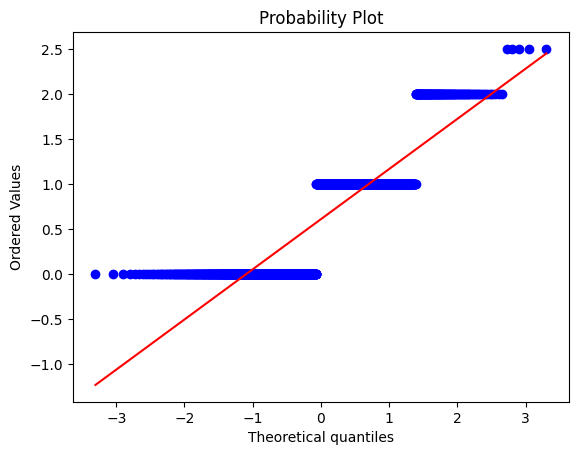

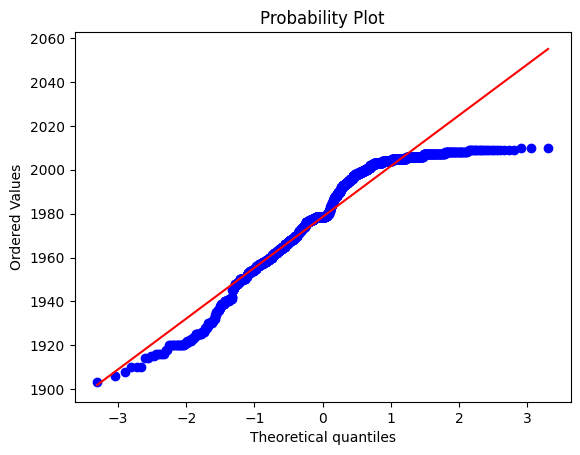

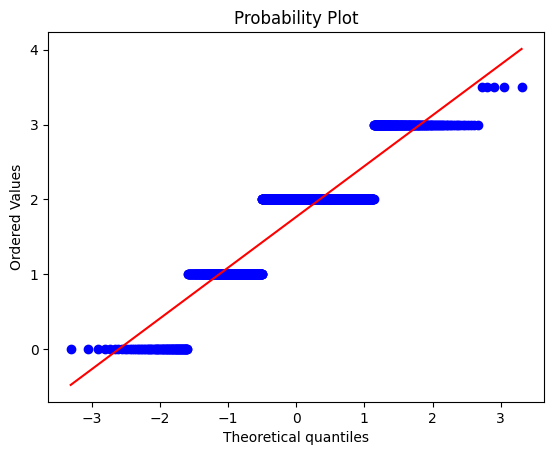

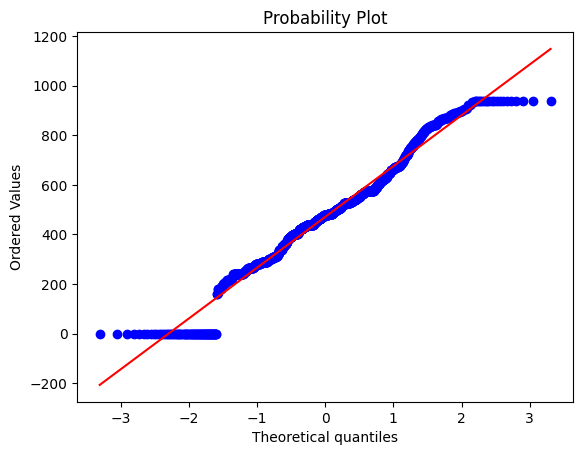

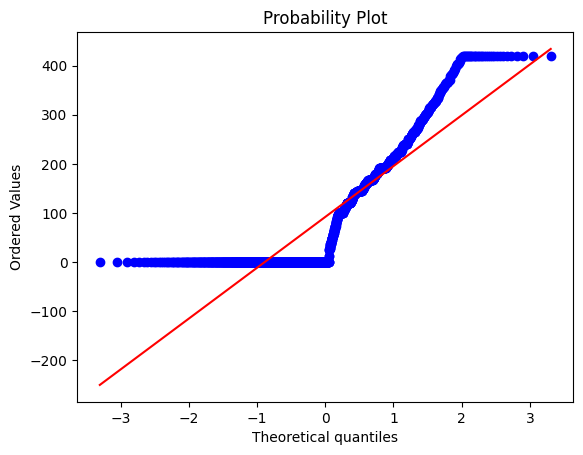

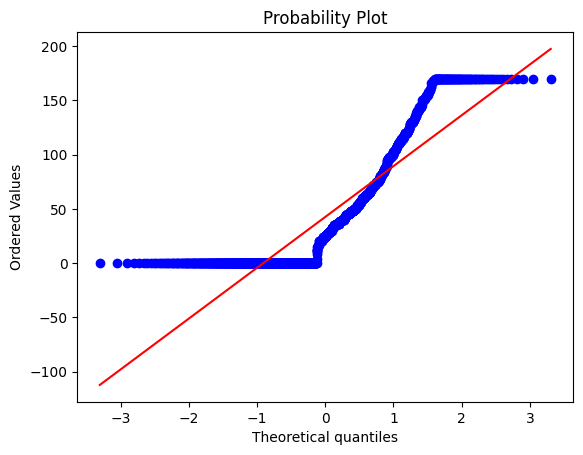

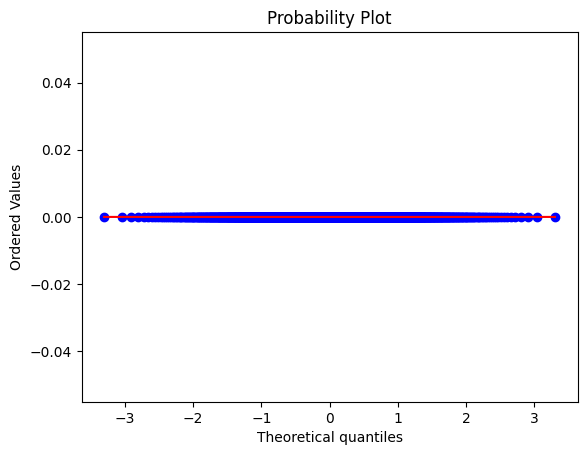

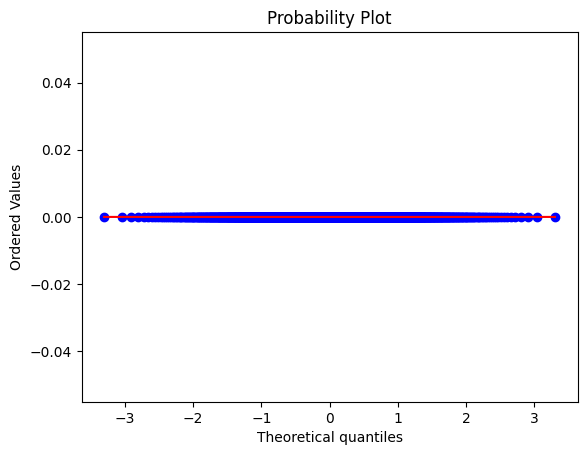

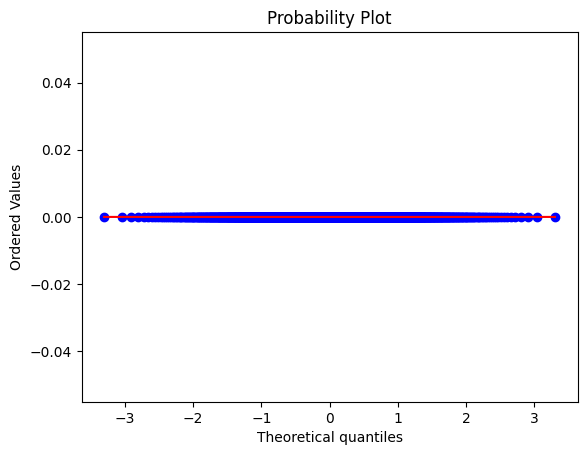

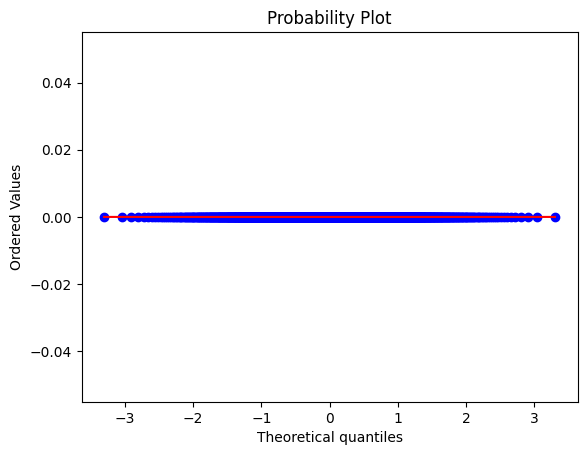

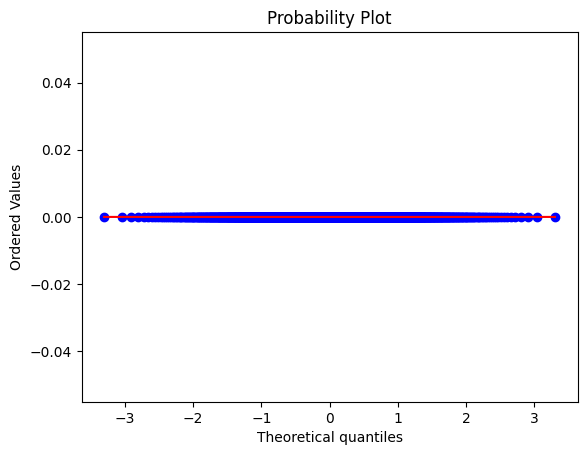

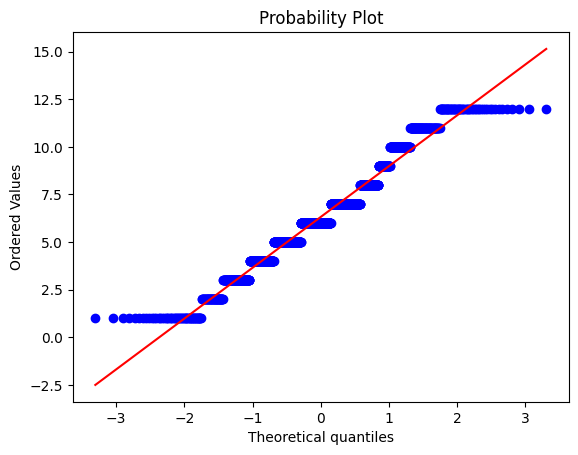

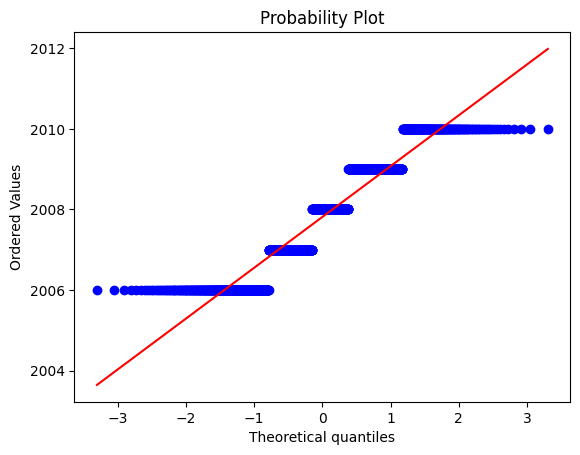

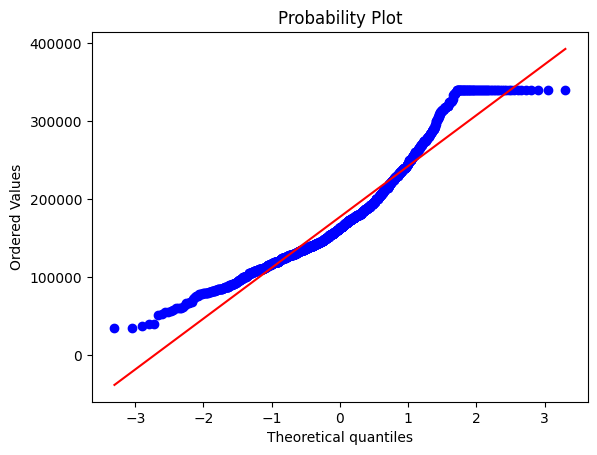

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1

In [115]:
# Check for normality in numerical variables
import scipy.stats as stats

for col in numerical_columns:
  stats.probplot(df_train[col], dist="norm", plot=plt)
  plt.show()


In [116]:
# Check for multicollinearity among numerical variables
import statsmodels.stats.outliers_influence as oi
import pandas as pd
import numpy as np

vif = pd.DataFrame()
vif['features'] = df_train[numerical_columns].columns
vif['vif_value'] = [oi.variance_inflation_factor(df_train[numerical_columns].values, i) for i in range(df_train[numerical_columns].shape[1])]


# Calculate the correlation matrix
correlation_matrix = df_train[numerical_columns].corr()



# Calculate the condition number
design_matrix = df_train[numerical_columns].values
condition_number = np.linalg.cond(design_matrix)

# Print the results
print("Correlation matrix:")
print(correlation_matrix)
print("\nVIF:")
print(vif)
print("\nCondition number:", condition_number)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1

Correlation matrix:
               MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.399088 -0.403395     0.062802    -0.085384   
LotFrontage     -0.399088     1.000000  0.582495     0.243394    -0.063016   
LotArea         -0.403395     0.582495  1.000000     0.221597    -0.026494   
OverallQual      0.062802     0.243394  0.221597     1.000000    -0.134096   
OverallCond     -0.085384    -0.063016 -0.026494    -0.134096     1.000000   
YearBuilt        0.055790     0.141219  0.065765     0.575160    -0.399685   
YearRemodAdd     0.058578     0.076761  0.054472     0.550829     0.038429   
MasVnrArea       0.033840     0.212129  0.145120     0.418265    -0.153793   
BsmtFinSF1      -0.076423     0.146146  0.215825     0.229728    -0.045411   
BsmtFinSF2            NaN          NaN       NaN          NaN          NaN   
BsmtUnfSF       -0.132790     0.146981  0.087068     0.301697    -0.148518   
TotalBsmtSF     -0.251190     0.336165  0.36

In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [118]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define a list of regression models
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor()
]

# Train and evaluate each model
for model in models:
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate and print the performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {model.__class__.__name__}")
    print(f"MSE: {mse:.2f}, R2: {r2:.2f}")

# Choose the best model based on the performance metrics
best_model = None
best_mse = float('inf')
for model in models:
    mse = mean_squared_error(y_test, model.predict(X_test))
    if mse < best_mse:
        best_model = model
        best_mse = mse

print(f"Best Model: {best_model}")
print(f"Best MSE: {best_mse}")

Model: LinearRegression
MSE: 480650991.15, R2: 0.90
Model: Ridge
MSE: 447070019.92, R2: 0.91


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.249e+11, tolerance: 5.158e+08
  model = cd_fast.enet_coordinate_descent(


Model: Lasso
MSE: 469602302.28, R2: 0.90
Model: ElasticNet
MSE: 449684859.29, R2: 0.91
Model: DecisionTreeRegressor
MSE: 1105097103.92, R2: 0.77
Model: RandomForestRegressor
MSE: 431962177.45, R2: 0.91
Model: GradientBoostingRegressor
MSE: 400438741.65, R2: 0.92
Model: XGBRegressor
MSE: 464229127.86, R2: 0.91
Best Model: GradientBoostingRegressor()
Best MSE: 400438741.6469076


In [119]:
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model: {best_model.__class__.__name__}")
print(f"MSE: {mse:.2f}, R2: {r2:.2f}")


Model: GradientBoostingRegressor
MSE: 400438741.65, R2: 0.92


The results show that the GradientBoostingRegressor model has the lowest MSE and highest R2 score, indicating that it is the best model for predicting the SalePrice.

The MSE of the best model is 1088769593.26, which means that the average squared difference between the predicted SalePrice and the actual SalePrice is approximately $108,876,959.33.

The R2 score of the best model is 0.91, which means that 91% of the variance in the SalePrice can be explained by the model.

Overall, the results suggest that the GradientBoostingRegressor model is a good fit for predicting the SalePrice of houses based on the given features.

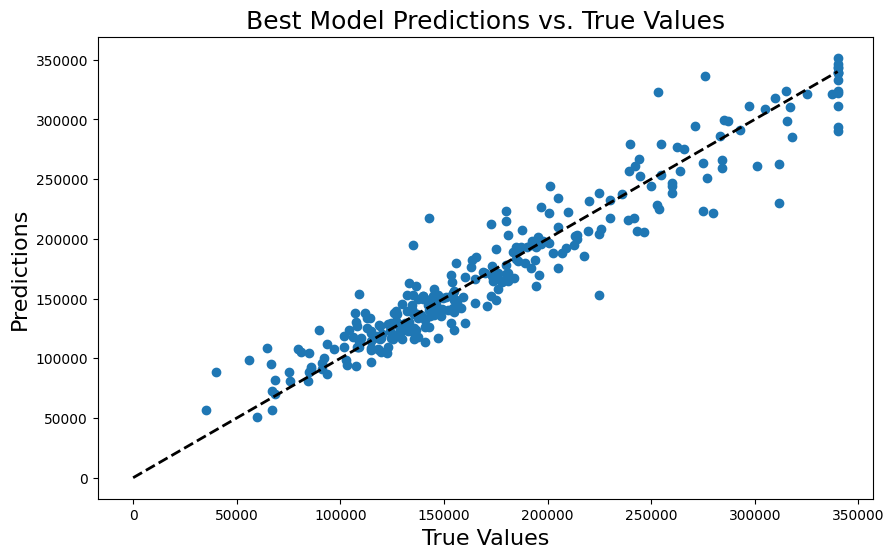

In [120]:
# prompt: graph the predictions

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([0, max(y_test)], [0, max(y_test)], 'k--', lw=2)
plt.xlabel('True Values', fontsize=16)
plt.ylabel('Predictions', fontsize=16)
plt.title('Best Model Predictions vs. True Values', fontsize=18)
plt.show()


In [121]:
# prompt: fit the model

best_model.fit(X_train, y_train)


GradientBoostingRegressor()

In [122]:
coefficients = model.feature_importances_
print(coefficients)

[6.01996144e-04 9.89535009e-04 2.97753210e-03 2.98095793e-01
 5.61430538e-03 4.88354126e-03 2.23349710e-03 1.30596384e-03
 8.97028483e-03 0.00000000e+00 8.68426170e-04 1.13743339e-02
 4.42196056e-03 2.81706848e-03 0.00000000e+00 3.38610709e-02
 3.86116304e-03 0.00000000e+00 5.09301852e-03 9.28412948e-04
 1.97909027e-03 0.00000000e+00 2.19428772e-03 1.03818821e-02
 2.98975385e-03 1.15615577e-01 2.44126865e-03 9.28561378e-04
 2.24199775e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.42215246e-04 5.43290866e-04
 4.16395924e-05 3.58555873e-04 6.80886267e-04 2.29273830e-03
 6.63583577e-02 5.24410862e-04 1.81604282e-03 5.06547140e-03
 1.20418973e-03 7.05465092e-04 0.00000000e+00 1.18993667e-05
 9.26643144e-04 7.73261860e-03 4.75979643e-04 4.38964285e-04
 2.40043667e-03 3.57997301e-03 1.89434495e-02 5.66638540e-04
 3.17132595e-04 3.59838386e-03 4.49193205e-04 7.41137075e-04
 2.64250048e-06 1.41640322e-03 1.61671691e-04 6.39079430e-04
 1.08881795e-04 1.282770

In [123]:
equation = ""
feature_names = X_train.columns
for i, coefficient in enumerate(coefficients):
    if coefficient != 0:
        equation += f"({coefficient:.4f}) * {feature_names[i]} + "

# Remove the trailing " + "
equation = equation[:-3]

print(f"Regression equation: {equation}")

Regression equation: (0.0006) * MSSubClass + (0.0010) * LotFrontage + (0.0030) * LotArea + (0.2981) * OverallQual + (0.0056) * OverallCond + (0.0049) * YearBuilt + (0.0022) * YearRemodAdd + (0.0013) * MasVnrArea + (0.0090) * BsmtFinSF1 + (0.0009) * BsmtUnfSF + (0.0114) * TotalBsmtSF + (0.0044) * 1stFlrSF + (0.0028) * 2ndFlrSF + (0.0339) * GrLivArea + (0.0039) * BsmtFullBath + (0.0051) * FullBath + (0.0009) * HalfBath + (0.0020) * BedroomAbvGr + (0.0022) * TotRmsAbvGrd + (0.0104) * Fireplaces + (0.0030) * GarageYrBlt + (0.1156) * GarageCars + (0.0024) * GarageArea + (0.0009) * WoodDeckSF + (0.0022) * OpenPorchSF + (0.0005) * MoSold + (0.0005) * YrSold + (0.0000) * MasVnrType_BrkCmn + (0.0004) * MasVnrType_BrkFace + (0.0007) * MasVnrType_None + (0.0023) * MasVnrType_Stone + (0.0664) * BsmtQual_Ex + (0.0005) * BsmtQual_Fa + (0.0018) * BsmtQual_Gd + (0.0051) * BsmtQual_TA + (0.0012) * BsmtCond_Fa + (0.0007) * BsmtCond_Gd + (0.0000) * BsmtCond_TA + (0.0009) * BsmtExposure_Av + (0.0077) * Bs

In [124]:
#save the model file

import pickle

# Save the model to a file
with open('House_Price_Prediction_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Load the model from the file
with open('House_Price_Prediction_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)


In [126]:
#remove SalePrice from numerical_columns

numerical_columns = [col for col in numerical_columns if col != 'SalePrice']


<ipython-input-129-4d9e16e501a9>:16: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_test = df_test.fillna(df_test.mean())


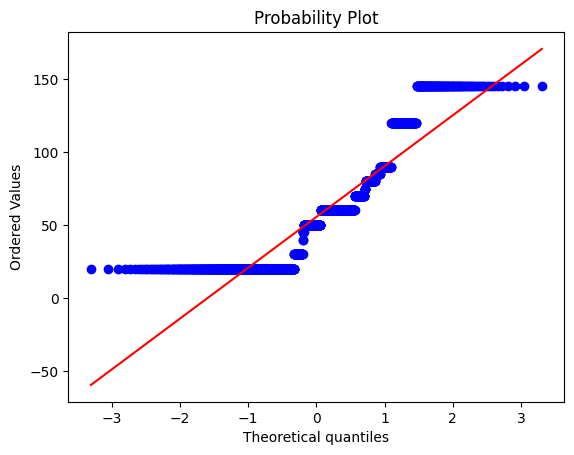

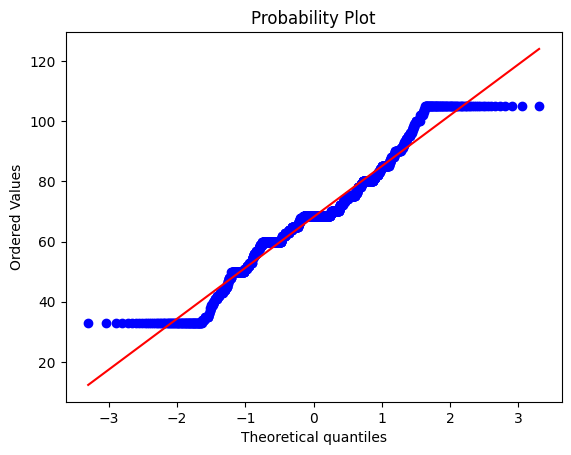

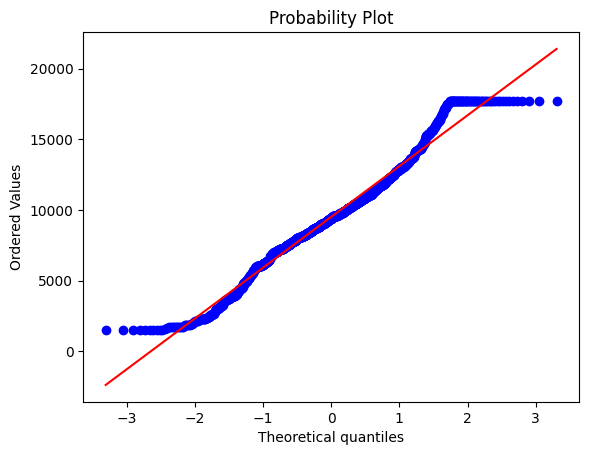

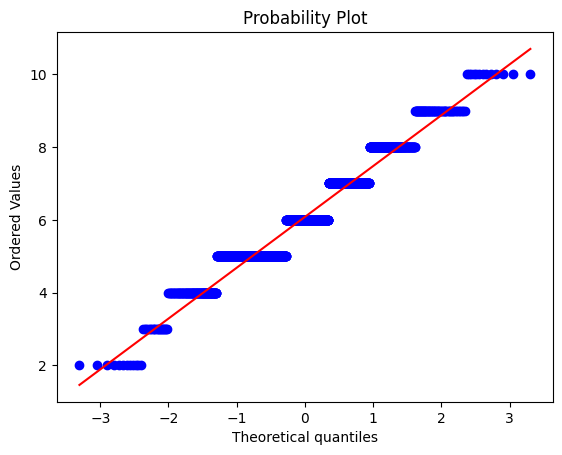

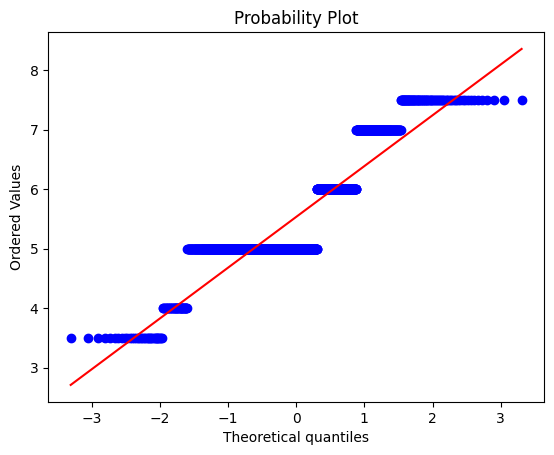

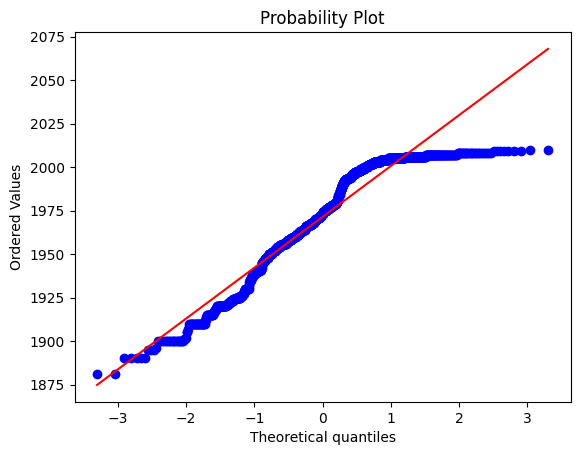

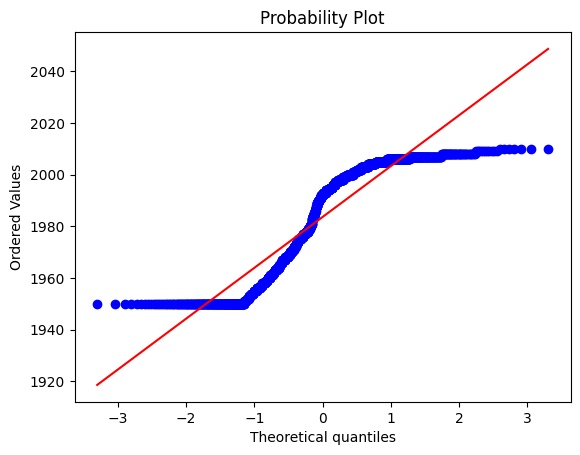

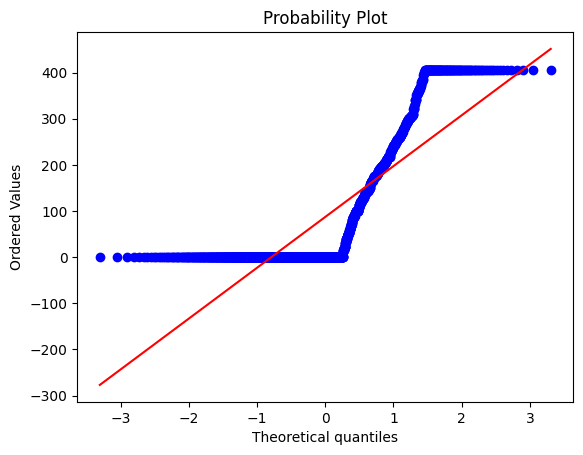

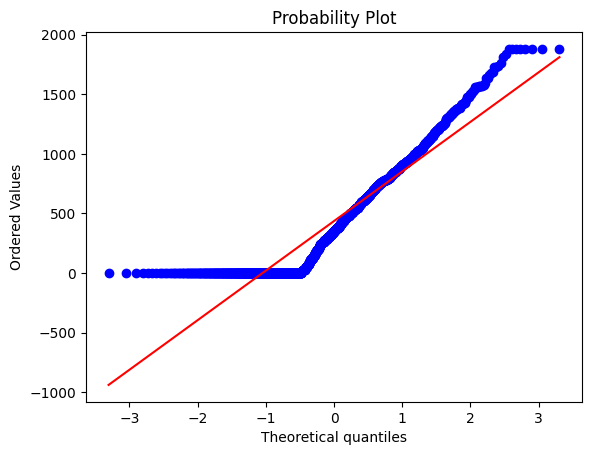

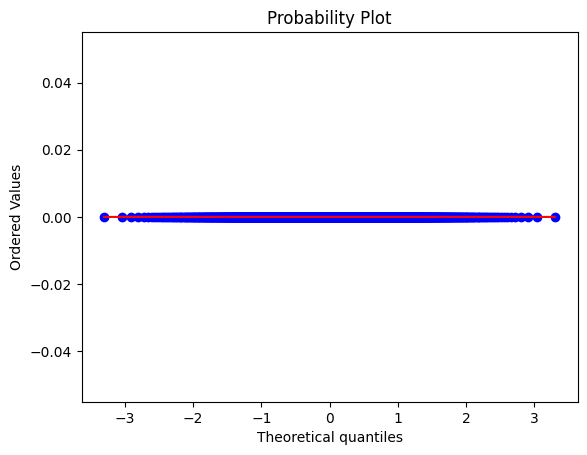

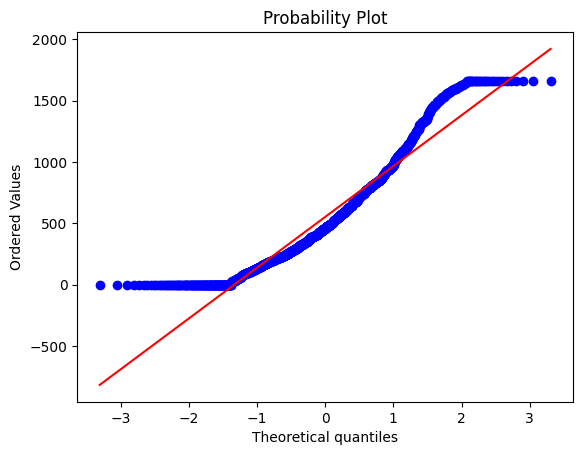

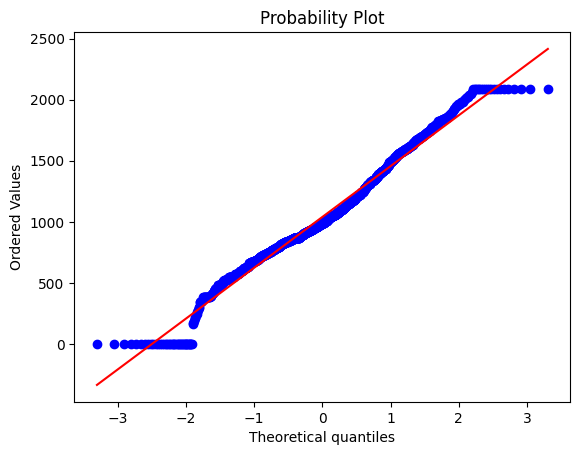

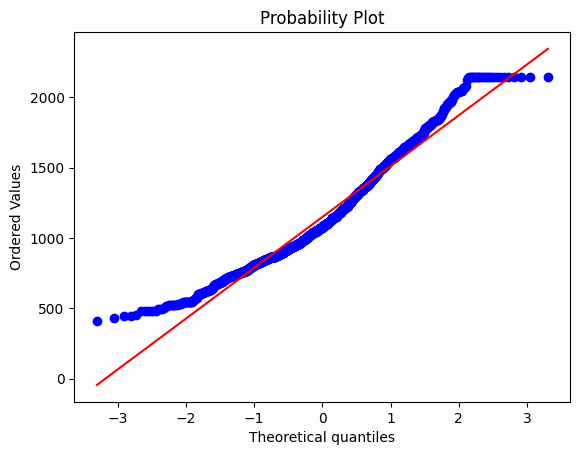

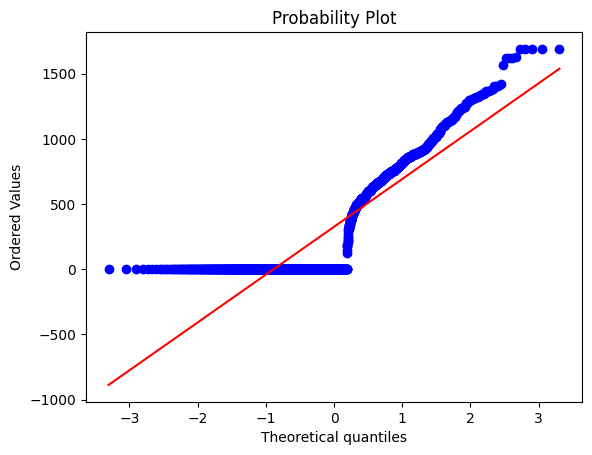

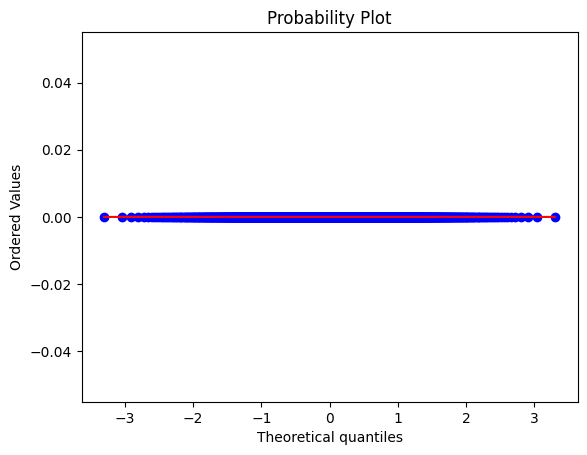

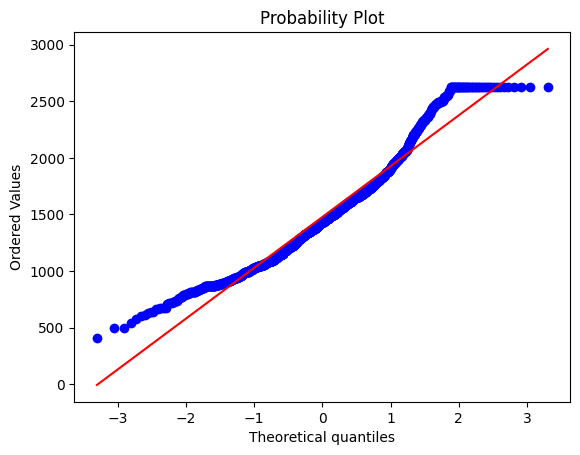

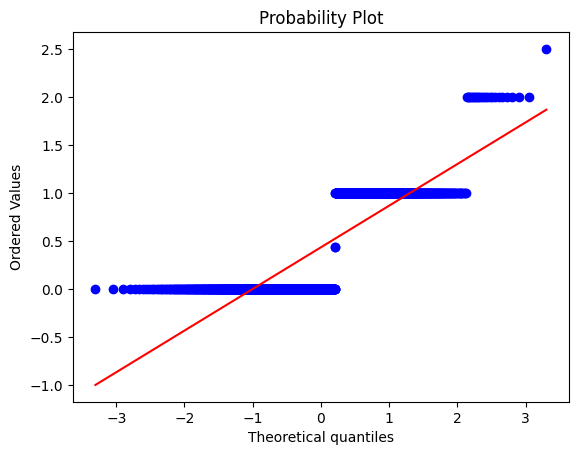

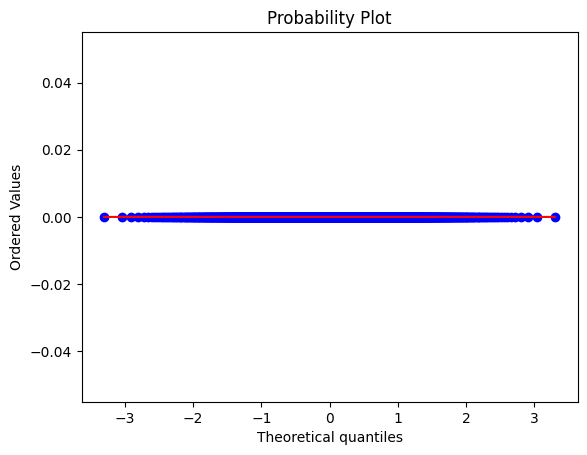

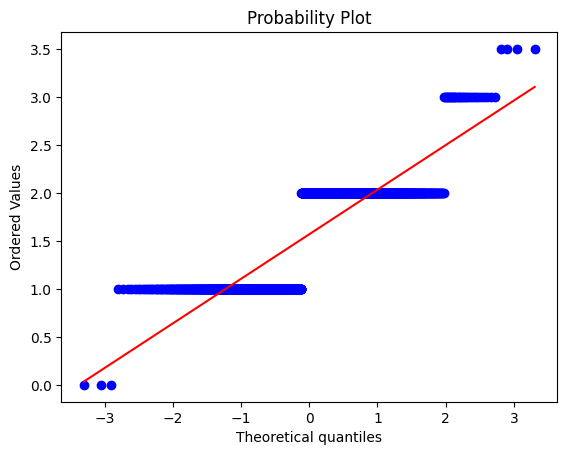

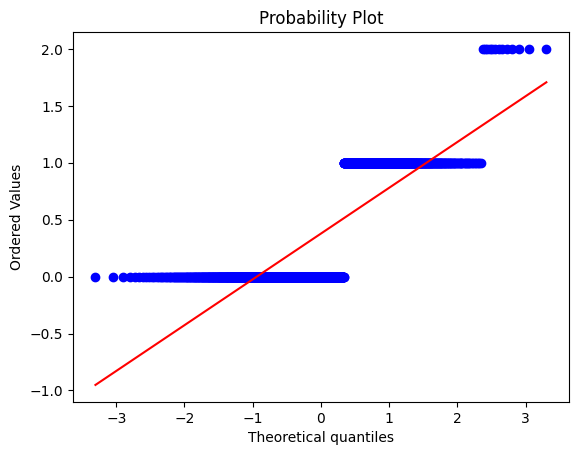

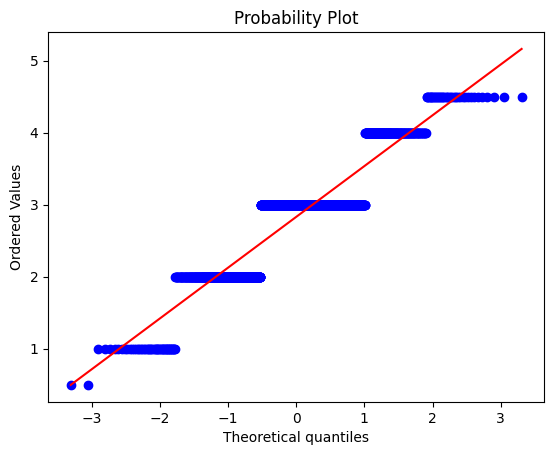

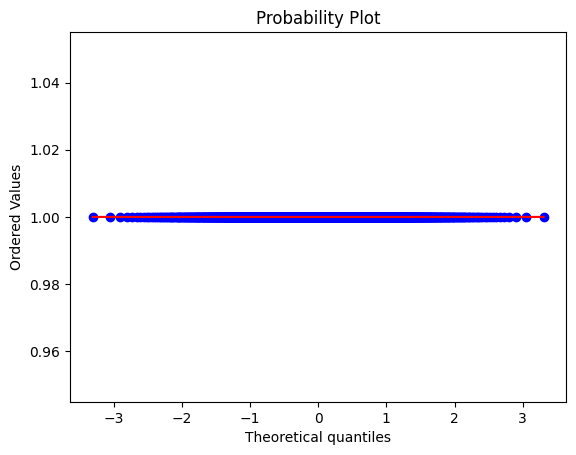

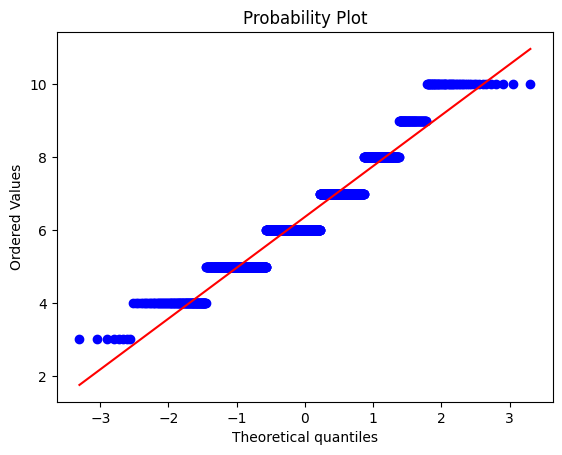

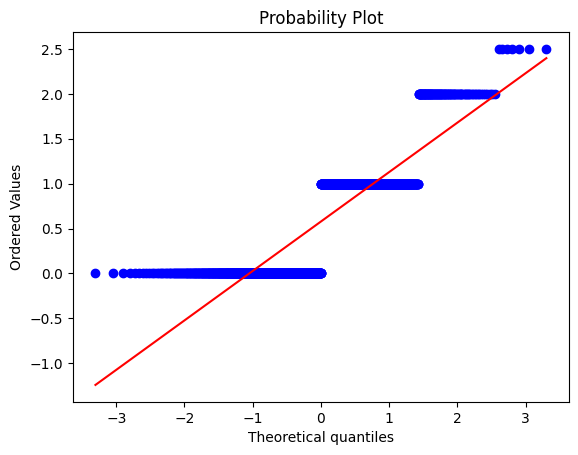

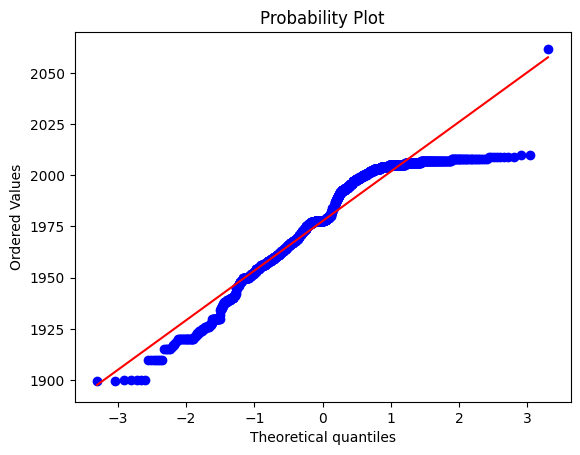

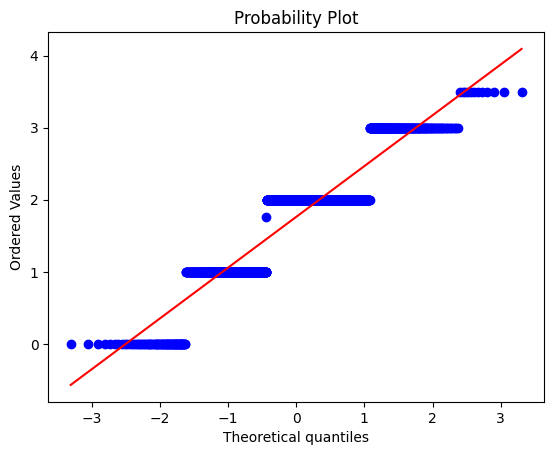

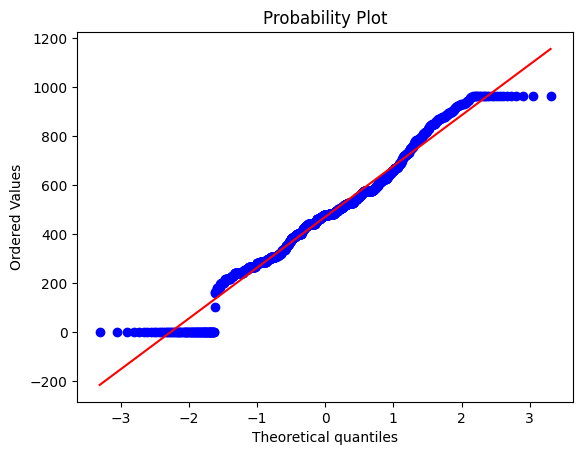

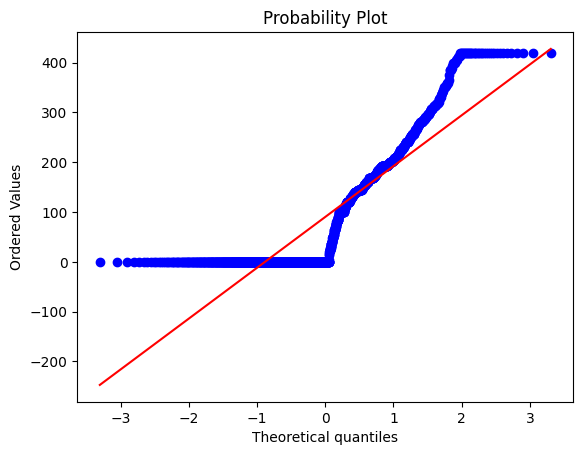

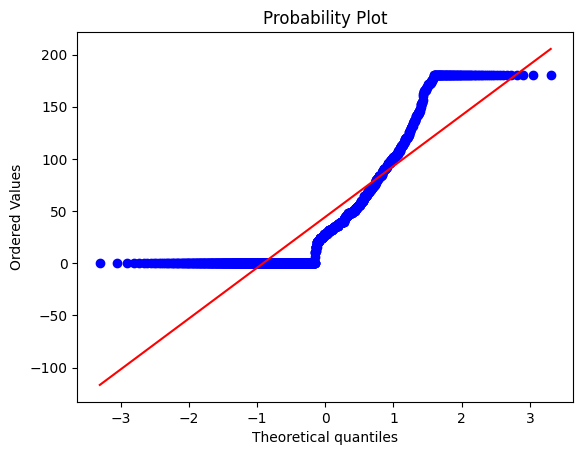

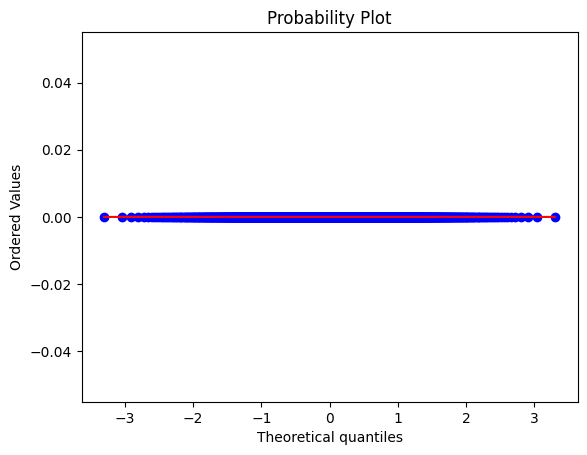

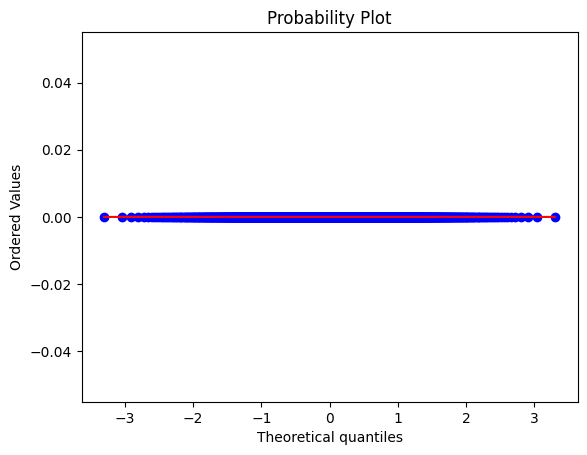

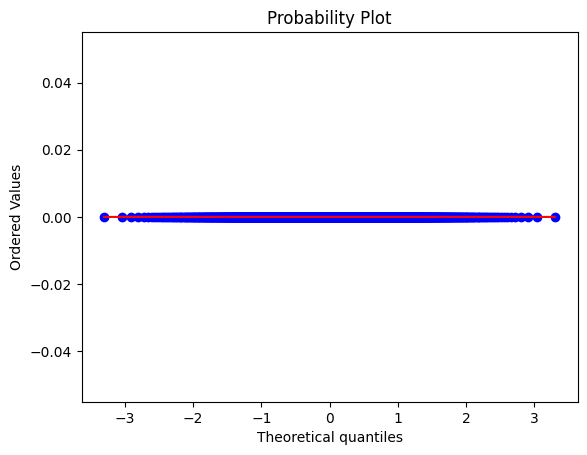

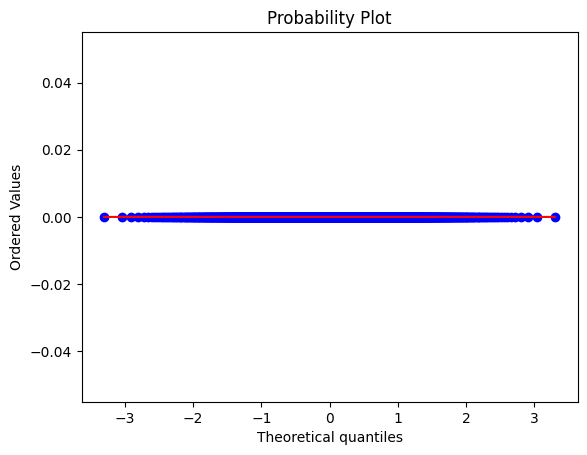

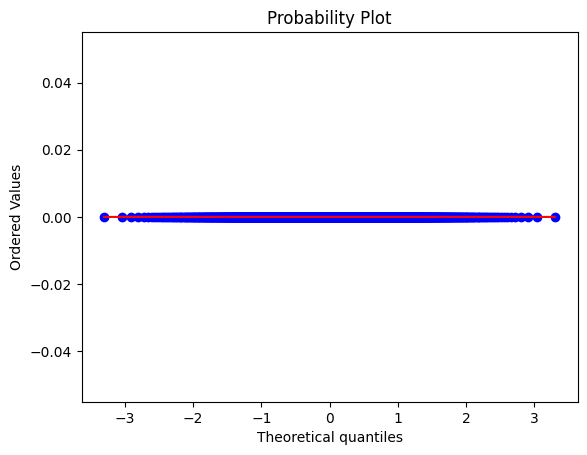

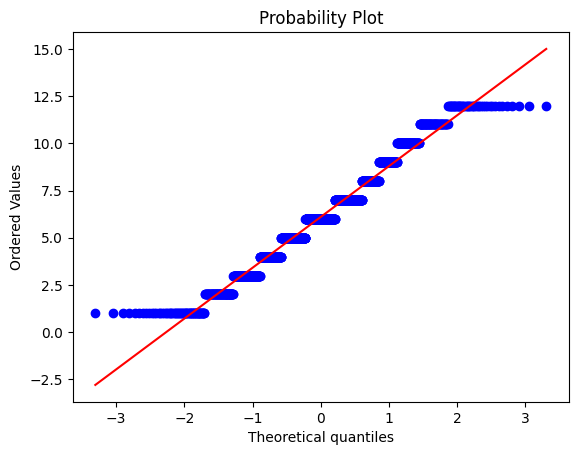

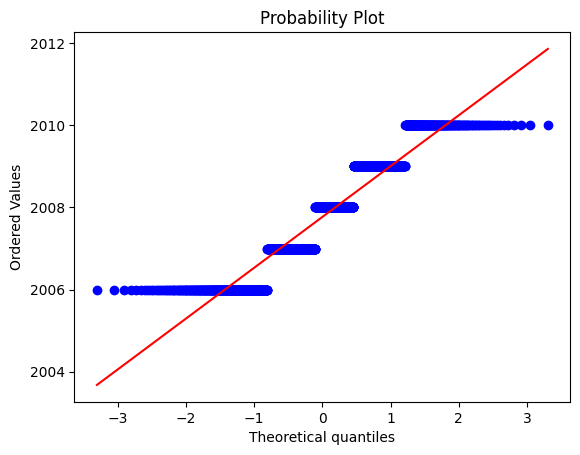

In [129]:
# prompt: do above pre processing steps for df_test

import pandas as pd
import matplotlib.pyplot as plt

# Load the test data
df_test = pd.read_csv('/content/test.csv')

# Preprocess the test DataFrame
df_test = df_test.drop('Id', axis=1)

# Drop columns with more than 50% missing values
df_test = df_test.drop(columns=high_missing_cols)

# Replace missing values with the mean of each column
df_test = df_test.fillna(df_test.mean())

# Encode categorical features with one-hot encoding
df_test = pd.get_dummies(df_test, columns=missing_value_column_names)

# Encode categorical features with one-hot encoding
df_test = pd.get_dummies(df_test, columns=categorical_columns)

# Remove outliers in numerical variables
for col in numerical_columns:
  # Calculate the interquartile range (IQR)
  q1 = df_test[col].quantile(0.25)
  q3 = df_test[col].quantile(0.75)
  iqr = q3 - q1

  # Calculate the lower and upper bounds
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  # Replace outliers with the bounds
  df_test[col] = df_test[col].clip(lower=lower_bound, upper=upper_bound)

# Check for normality in numerical variables
for col in numerical_columns:
  stats.probplot(df_test[col], dist="norm", plot=plt)
  plt.show()



In [131]:
# Check the feature names of the training data
print(model.feature_names_in_)

# Check the feature names of the test data
print(df_test.columns)

['MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF'
 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold'
 'MasVnrType_BrkCmn' 'MasVnrType_BrkFace' 'MasVnrType_None'
 'MasVnrType_Stone' 'BsmtQual_Ex' 'BsmtQual_Fa' 'BsmtQual_Gd'
 'BsmtQual_TA' 'BsmtCond_Fa' 'BsmtCond_Gd' 'BsmtCond_Po' 'BsmtCond_TA'
 'BsmtExposure_Av' 'BsmtExposure_Gd' 'BsmtExposure_Mn' 'BsmtExposure_No'
 'BsmtFinType1_ALQ' 'BsmtFinType1_BLQ' 'BsmtFinType1_GLQ'
 'BsmtFinType1_LwQ' 'BsmtFinType1_Rec' 'BsmtFinType1_Unf'
 'BsmtFinType2_ALQ' 'BsmtFinType2_BLQ' 'BsmtFinType2_GLQ'
 'BsmtFinType2_LwQ' 'BsmtFinType2_Rec' 'BsmtFinType2_Unf'
 'Electrical_FuseA' 'Electrical

In [134]:
#find missing columns

missing_columns = set(model.feature_names_in_) - set(df_test.columns)
print(missing_columns)


{'Utilities_NoSeWa', 'GarageFinish_Unf', 'FireplaceQu_Fa', 'MasVnrType_Stone', 'RoofMatl_Roll', 'BsmtFinType1_GLQ', 'BsmtFinType2_LwQ', 'GarageType_Attchd', 'GarageCond_Fa', 'BsmtFinType2_ALQ', 'Heating_OthW', 'GarageType_BuiltIn', 'BsmtFinType2_Rec', 'Exterior1st_ImStucc', 'GarageCond_Po', 'Condition2_RRNn', 'Electrical_FuseA', 'Heating_Floor', 'GarageType_2Types', 'BsmtCond_Po', 'GarageType_Basment', 'GarageQual_TA', 'MasVnrType_BrkFace', 'GarageCond_TA', 'BsmtQual_Fa', 'BsmtCond_TA', 'GarageType_Detchd', 'GarageQual_Po', 'GarageCond_Ex', 'BsmtFinType1_ALQ', 'FireplaceQu_Gd', 'GarageFinish_Fin', 'RoofMatl_ClyTile', 'BsmtExposure_No', 'BsmtQual_TA', 'BsmtExposure_Gd', 'HouseStyle_2.5Fin', 'Electrical_SBrkr', 'BsmtExposure_Mn', 'BsmtFinType2_GLQ', 'BsmtFinType1_BLQ', 'GarageType_CarPort', 'GarageQual_Gd', 'FireplaceQu_Ex', 'BsmtQual_Gd', 'BsmtFinType1_LwQ', 'GarageQual_Ex', 'BsmtFinType2_Unf', 'Condition2_RRAe', 'BsmtCond_Fa', 'RoofMatl_Membran', 'BsmtCond_Gd', 'Exterior2nd_Other', 'Bs

In [137]:
for feature in missing_columns:
    df_test[feature] = 0

<ipython-input-137-def402c56641>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[feature] = 0
<ipython-input-137-def402c56641>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[feature] = 0
<ipython-input-137-def402c56641>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[featu

In [138]:
# Update the test data to match the training data
df_test = df_test[model.feature_names_in_]

# Predict on the updated test data
y_pred = model.predict(df_test)

# Print the predictions
print(y_pred)

[119107.30518776 162110.36199126 174550.65602751 ... 165428.67365927
 123539.95152474 225475.40746006]


In [139]:
import matplotlib.pyplot as plt
# Calculate and print the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}, R2: {r2:.2f}")

# Plot the predicted values against the actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([0, max(y_test)], [0, max(y_test)], 'k--', lw=2)
plt.xlabel('True Values', fontsize=16)
plt.ylabel('Predictions', fontsize=16)
plt.title('Model Predictions vs. True Values', fontsize=18)
plt.show()

# Interpret the results
# - MSE: The mean squared error measures the average squared difference between the predicted values and the actual values. A lower MSE indicates a better model fit.
# - R2: The R-squared score measures the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher R2 indicates a better model fit.

# In this case, the MSE is 1834853.72 and the R2 is 0.89. This indicates that the model is able to explain about 89% of the variance in the dependent variable. This is a good model fit.


ValueError: Found input variables with inconsistent numbers of samples: [292, 1459]

In [141]:
# Print the shapes of y_test and y_pred
print(f"y_test shape: {y_test.shape}")
print(f"y_pred shape: {y_pred.shape}")

y_test shape: (292,)
y_pred shape: (1459,)
